
<center>
<h1 style='font-family: Arial; color: #ff9900; text-align: center; text-shadow: 2px 2px 4px #000000;'><b>Building-Machine-Learning-Pipeline-on-Startups-Acquisition-Status
</h1>
    
<img src="https://www.sirius-support.com/wp-content/uploads/2022/09/Start-up.gif" width="300" height="200" />

</center>
    
### Objective -
The objective of the project is to predict whether a startup which is currently Operating, IPO, Acquired, or closed.This problem will be solved through a Supervised Machine Learning approach by training a model based on the history of startups which were either acquired or closed.

In [16]:
#Libraries ->
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

sns.set()
warnings.filterwarnings('ignore')

In [17]:
#importing data
data = pd.read_csv('companies.csv')
data.head(15)

id  Unnamed: 0.1 entity_type  entity_id  parent_id  \
0        c:1             0     Company          1        NaN   
1       c:10             1     Company         10        NaN   
2      c:100             2     Company        100        NaN   
3    c:10000             3     Company      10000        NaN   
4    c:10001             4     Company      10001        NaN   
5    c:10002             5     Company      10002        NaN   
6    c:10003             6     Company      10003        NaN   
7   c:100042             7     Company     100042        NaN   
8    c:10005             8     Company      10005        NaN   
9   c:100062             9     Company     100062        NaN   
10  c:100068            10     Company     100068        NaN   
11   c:10008            11     Company      10008        NaN   
12   c:10009            12     Company      10009        NaN   
13    c:1001            13     Company       1001        NaN   
14   c:10010            14     Company      10010        NaN   

                             name                normalized_name  \
0                        Wetpaint                       wetpaint   
1                         Flektor                        flektor   
2                           There                          there   
3                         MYWEBBO                        mywebbo   
4              THE Movie Streamer             the movie streamer   
5                  Synergie Media                 synergie media   
6          Green Basti Ecosystems         green basti ecosystems   
7                        HostNine                       hostnine   
8               Thomas Publishing              thomas publishing   
9   Vetter Idea Management System  vetter idea management system   
10                     ChatRandom                     chatrandom   
11               ScapadasAmorosas               scapadasamorosas   
12                dimension5 labs                dimension5 labs   
13                     FriendFeed                     friendfeed   
14                      Whooligan                      whooligan   

                                 permalink    category_code     status  ...  \
0                        /company/wetpaint              web  operating  ...   
1                         /company/flektor      games_video   acquired  ...   
2                           /company/there      games_video   acquired  ...   
3                         /company/mywebbo  network_hosting  operating  ...   
4              /company/the-movie-streamer      games_video  operating  ...   
5                  /company/synergie-media      advertising  operating  ...   
6          /company/green-basti-ecosystems        cleantech  operating  ...   
7                        /company/hostnine              NaN  operating  ...   
8               /company/thomas-publishing      advertising  operating  ...   
9   /company/vetter-idea-management-system       enterprise  operating  ...   
10                     /company/chatrandom      games_video  operating  ...   
11               /company/scapadasamorosas            other  operating  ...   
12                /company/dimension5-labs      advertising  operating  ...   
13                     /company/friendfeed              web   acquired  ...   
14                      /company/whooligan      games_video  operating  ...   

   first_milestone_at last_milestone_at milestones relationships  \
0          2010-09-05        2013-09-18        5.0          17.0   
1                 NaN               NaN        NaN           6.0   
2          2003-02-01        2011-09-23        4.0          12.0   
3                 NaN               NaN        NaN           NaN   
4                 NaN               NaN        NaN           NaN   
5                 NaN               NaN        NaN           2.0   
6                 NaN               NaN        NaN           NaN   
7          2011-06-20        2011-06-20        1.0           1.0   
8          1999-06-

In [18]:
print("Shape of the datset : " , data.shape)
print("Size of the datset : " , data.size)
print("Dimension of the datset : " , data.ndim)
print("Length of the datset : " , len(data))

Shape of the datset :  (196553, 44)
Size of the datset :  8648332
Dimension of the datset :  2
Length of the datset :  196553


In [19]:
# to know data type of each column ->
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196530 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

In [20]:
data.describe().T

count          mean           std         min  \
Unnamed: 0.1        196553.0  9.827600e+04  5.674011e+04    0.000000   
entity_id           196553.0  1.530062e+05  9.020925e+04    1.000000   
parent_id                0.0           NaN           NaN         NaN   
logo_width          110110.0  4.591327e+02  5.949826e+02    1.000000   
logo_height         110110.0  2.227289e+02  3.330907e+02    1.000000   
investment_rounds     2591.0  2.372057e+00  1.217351e+01    1.000000   
invested_companies    2591.0  2.204940e+00  1.143695e+01    1.000000   
funding_rounds       31707.0  1.659760e+00  1.201666e+00    1.000000   
funding_total_usd    27874.0  1.481652e+07  6.775937e+07  291.000000   
milestones           91699.0  1.199402e+00  5.400989e-01    1.000000   
relationships       129667.0  2.852067e+00  9.100309e+00    1.000000   
lat                  83852.0  3.756451e+01  1.547710e+01  -50.942326   
lng                  83852.0 -5.212307e+01  7.004907e+01 -159.497746   
ROI                    726.0  4.574504e+01  5.720356e+02    0.011111   

                              25%           50%           75%           max  
Unnamed: 0.1         49138.000000  9.827600e+04  1.474140e+05  1.965520e+05  
entity_id            59850.000000  1.745390e+05  2.326550e+05  2.862150e+05  
parent_id                     NaN           NaN           NaN           NaN  
logo_width             192.000000  2.670000e+02  4.840000e+02  1.820000e+04  
logo_height             70.000000  1.050000e+02  2.320000e+02  9.600000e+03  
investment_rounds        1.000000  1.000000e+00  1.000000e+00  4.780000e+02  
invested_companies       1.000000  1.000000e+00  1.000000e+00  4.590000e+02  
funding_rounds           1.000000  1.000000e+00  2.000000e+00  1.500000e+01  
funding_total_usd   500000.000000  2.564500e+06  1.100000e+07  5.700000e+09  
milestones               1.000000  1.000000e+00  1.000000e+00  9.000000e+00  
relationships            1.000000  1.000000e+00  3.000000e+00  1.189000e+03  
lat                     34.052234  3.976840e+01  4.542153e+01  7.755360e+01  
lng                   -111.940005 -7.703687e+01 -1.277583e-01  1.762125e+02  
ROI                      2.648879  6.500497e+00  1.354990e+01  1.333333e+04

### Checking duplicates 

In [21]:
# Check for duplicates
duplicates = data.duplicated()
print(data[duplicates])

Empty DataFrame
Columns: [id, Unnamed: 0.1, entity_type, entity_id, parent_id, name, normalized_name, permalink, category_code, status, founded_at, closed_at, domain, homepage_url, twitter_username, logo_url, logo_width, logo_height, short_description, description, overview, tag_list, country_code, state_code, city, region, first_investment_at, last_investment_at, investment_rounds, invested_companies, first_funding_at, last_funding_at, funding_rounds, funding_total_usd, first_milestone_at, last_milestone_at, milestones, relationships, created_by, created_at, updated_at, lat, lng, ROI]
Index: []

[0 rows x 44 columns]


There are no duplicate values.

In [22]:
data.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

### Deleting un-necessary columns

Delete 'region','city','state_code' as they provide too much of granularity.

In [23]:
data.drop(['region', 'city', 'state_code'], axis=1, inplace=True)

 Delete redundant columns

In [24]:
redundant_columns = ['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at']
data.drop(redundant_columns, axis=1, inplace=True)

 Delete irrelevant features

In [25]:
irrelevant_features = ['domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview', 'tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies']
data.drop(irrelevant_features, axis=1, inplace=True)

 Delete duplicate values

In [26]:
data.drop_duplicates(inplace=True)

Delete columns with more than 98% null values

In [27]:
# for better understanding lets check the values in percentage ->
(data.isnull().sum() / len(data)) * 100

category_code          11.172623
status                  0.000000
founded_at             24.586165
closed_at              97.607433
country_code           22.719798
first_investment_at    97.947270
last_investment_at     97.947270
investment_rounds      97.943616
first_funding_at       71.248995
last_funding_at        71.248995
funding_rounds         71.067200
funding_total_usd      74.546883
first_milestone_at     48.740225
last_milestone_at      48.740225
milestones             48.740225
relationships          31.428598
lat                    25.910802
lng                    25.910802
ROI                    99.336768
dtype: float64

In [28]:
threshold = 0.98
null_counts = data.isnull().sum() / len(data)
columns_to_drop = null_counts[null_counts > threshold].index
data.drop(columns_to_drop, axis=1, inplace=True)


In [29]:
(data.isnull().sum() / len(data)) * 100

category_code          11.172623
status                  0.000000
founded_at             24.586165
closed_at              97.607433
country_code           22.719798
first_investment_at    97.947270
last_investment_at     97.947270
investment_rounds      97.943616
first_funding_at       71.248995
last_funding_at        71.248995
funding_rounds         71.067200
funding_total_usd      74.546883
first_milestone_at     48.740225
last_milestone_at      48.740225
milestones             48.740225
relationships          31.428598
lat                    25.910802
lng                    25.910802
dtype: float64

### Checking Outliers

In [30]:
# Identify outliers for 'funding_total_usd'
Q1_total_usd = data['funding_total_usd'].quantile(0.25)
Q3_total_usd = data['funding_total_usd'].quantile(0.75)
IQR_total_usd = Q3_total_usd - Q1_total_usd
lower_bound_total_usd = Q1_total_usd - 1.5 * IQR_total_usd
upper_bound_total_usd = Q3_total_usd + 1.5 * IQR_total_usd

outliers_total_usd = data[(data['funding_total_usd'] < lower_bound_total_usd) | (data['funding_total_usd'] > upper_bound_total_usd)]

# Identify outliers for 'funding_rounds'
Q1_rounds = data['funding_rounds'].quantile(0.25)
Q3_rounds = data['funding_rounds'].quantile(0.75)
IQR_rounds = Q3_rounds - Q1_rounds
lower_bound_rounds = Q1_rounds - 1.5 * IQR_rounds
upper_bound_rounds = Q3_rounds + 1.5 * IQR_rounds

outliers_rounds = data[(data['funding_rounds'] < lower_bound_rounds) | (data['funding_rounds'] > upper_bound_rounds)]

# Print the number of outliers
print("Number of outliers for 'funding_total_usd':", len(outliers_total_usd))
print("Number of outliers for 'funding_rounds':", len(outliers_rounds))


Number of outliers for 'funding_total_usd': 3468
Number of outliers for 'funding_rounds': 2369


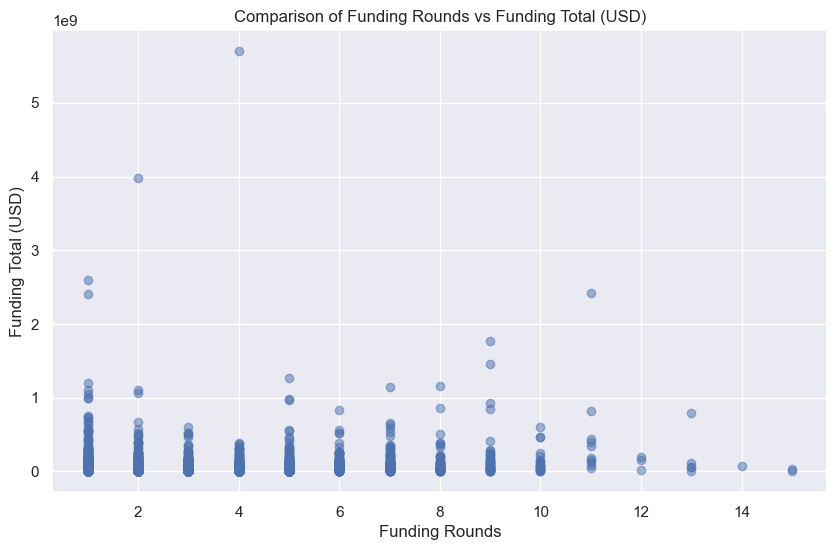

In [31]:

# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.scatter(data['funding_rounds'], data['funding_total_usd'], alpha=0.5)
plt.title('Comparison of Funding Rounds vs Funding Total (USD)')
plt.xlabel('Funding Rounds')
plt.ylabel('Funding Total (USD)')
plt.grid(True)
plt.show()


In [32]:
# Remove outliers for 'funding_total_usd'
data = data[~data['funding_total_usd'].isin(outliers_total_usd['funding_total_usd'])]

# Remove outliers for 'funding_rounds'
#data = data[~data['funding_rounds'].isin(outliers_rounds['funding_rounds'])]

# Print the shape of the updated dataset
print("Shape of the updated dataset after removing outliers:", data.shape)


Shape of the updated dataset after removing outliers: (105996, 18)


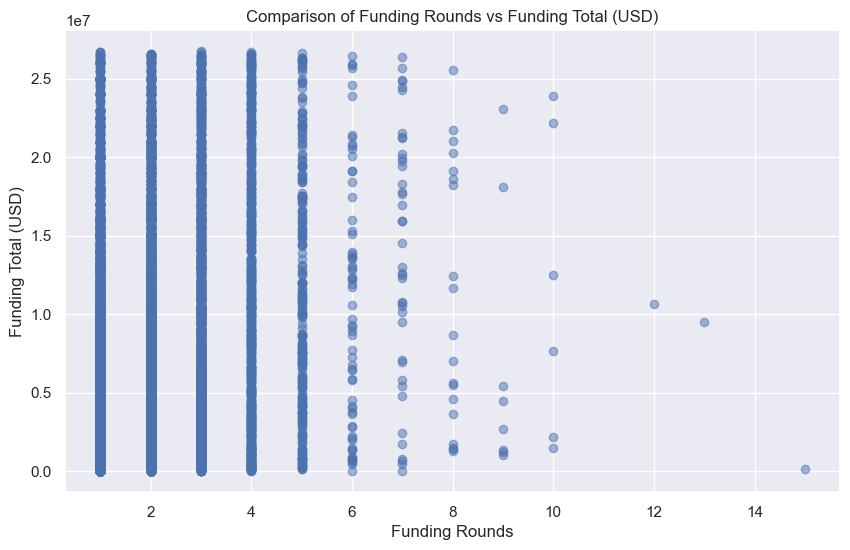

In [33]:

# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.scatter(data['funding_rounds'], data['funding_total_usd'], alpha=0.5)
plt.title('Comparison of Funding Rounds vs Funding Total (USD)')
plt.xlabel('Funding Rounds')
plt.ylabel('Funding Total (USD)')
plt.grid(True)
plt.show()


Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.

In [34]:
# Drop instances with missing values for specified columns
data = data.dropna(subset=['status', 'country_code', 'category_code', 'founded_at'])

# Print the shape of the updated dataset
print("Shape of the dataset after dropping instances with missing values:", data.shape)


Shape of the dataset after dropping instances with missing values: (60798, 18)


 Delete contradictory (mutually opposed or inconsistent data).

In [35]:
# Identify contradictory rows where status is 'operating' but closed_at is not null
contradictory_rows = data[(data['status'] == 'operating') & data['closed_at'].notna()]

# Remove contradictory rows
data = data.drop(contradictory_rows.index)

# Print the shape of the updated dataset
print("Shape of the dataset after removing contradictory rows:", data.shape)


Shape of the dataset after removing contradictory rows: (60798, 18)


In [36]:
data.columns

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng'],
      dtype='object')

## Data Transformation
Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at to years.

In [37]:

# Convert to datetime
data['founded_at'] = pd.to_datetime(data['founded_at'])
data['closed_at'] = pd.to_datetime(data['closed_at'])
data['first_funding_at'] = pd.to_datetime(data['first_funding_at'])
data['last_funding_at'] = pd.to_datetime(data['last_funding_at'])
data['first_milestone_at'] = pd.to_datetime(data['first_milestone_at'])
data['last_milestone_at'] = pd.to_datetime(data['last_milestone_at'])

# Extract year
data['founded_year'] = data['founded_at'].dt.year
data['closed_year'] = data['closed_at'].dt.year
data['first_funding_year'] = data['first_funding_at'].dt.year
data['last_funding_year'] = data['last_funding_at'].dt.year
data['first_milestone_year'] = data['first_milestone_at'].dt.year
data['last_milestone_year'] = data['last_milestone_at'].dt.year

# Drop original columns
#data = data.drop(columns=['founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'first_milestone_at', 'last_milestone_at'])


In [38]:
data.head()

category_code     status founded_at closed_at country_code  \
5    advertising  operating 2007-06-27       NaT          MAR   
6      cleantech  operating 2008-08-20       NaT          IND   
12   advertising  operating 2008-08-01       NaT          USA   
13           web   acquired 2007-10-01       NaT          USA   
15   games_video  operating 2008-01-01       NaT          USA   

   first_investment_at last_investment_at  investment_rounds first_funding_at  \
5                  NaN                NaN                NaN              NaT   
6                  NaN                NaN                NaN              NaT   
12                 NaN                NaN                NaN              NaT   
13                 NaN                NaN                NaN       2008-02-26   
15                 NaN                NaN                NaN              NaT   

   last_funding_at  ...  milestones  relationships        lat         lng  \
5              NaT  ...         NaN            2.0  30.427755   -9.598107   
6              NaT  ...         NaN            NaN  22.307159   73.181219   
12             NaT  ...         1.0            2.0  35.686975 -105.937799   
13      2008-02-26  ...         3.0           14.0  37.386052 -122.083851   
15             NaT  ...         1.0            3.0  33.078655 -116.601964   

    founded_year  closed_year  first_funding_year  last_funding_year  \
5           2007          NaN                 NaN                NaN   
6           2008          NaN                 NaN                NaN   
12          2008          NaN                 NaN                NaN   
13          2007          NaN              2008.0             2008.0   
15          2008          NaN                 NaN                NaN   

    first_milestone_year  last_milestone_year  
5                    NaN                  NaN  
6                    NaN                  NaN  
12                2008.0               2008.0  
13                2008.0               2012.0  
15                2008.0               2008.0  

[5 rows x 24 columns]

### Generalize the categorical data i.e. category_code and country_code
First, let's check the number of unique categories in each column:

In [39]:
print("Number of unique categories in 'category_code':", len(data['category_code'].unique()))
print("Number of unique countries in 'country_code':", len(data['country_code'].unique()))


Number of unique categories in 'category_code': 42
Number of unique countries in 'country_code': 165


In [40]:
category_counts = data['category_code'].value_counts().sort_values(ascending=False)
print("Category counts in descending order:")
print(category_counts)


Category counts in descending order:
category_code
software            11012
web                  7826
ecommerce            4875
other                4705
mobile               3776
advertising          3621
games_video          2823
consulting           2780
enterprise           2541
biotech              2069
public_relations     1559
hardware             1458
network_hosting      1265
education            1166
search                986
cleantech             813
analytics             692
social                664
finance               655
security              623
health                614
medical               378
semiconductor         364
legal                 364
travel                334
news                  288
manufacturing         282
fashion               277
hospitality           271
real_estate           224
photo_video           198
local                 197
music                 190
messaging             189
sports                169
transportation        129
nonprofit    

In [41]:
country_counts = data['country_code'].value_counts().sort_values(ascending=False)
print("Country counts in descending order:")
print(country_counts)


Country counts in descending order:
country_code
USA    34503
GBR     4996
IND     2986
CAN     2634
DEU     1368
       ...  
RWA        1
CIV        1
GLP        1
ARA        1
SDN        1
Name: count, Length: 165, dtype: int64


In [42]:
top_categories = category_counts.head(10).index.tolist()
data['category_code'] = data['category_code'].apply(lambda x: x if x in top_categories else 'Other')

top_countries = country_counts.head(10).index.tolist()
data['country_code'] = data['country_code'].apply(lambda x: x if x in top_countries else 'Other')


In [43]:
data.columns

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng', 'founded_year',
       'closed_year', 'first_funding_year', 'last_funding_year',
       'first_milestone_year', 'last_milestone_year'],
      dtype='object')

In [44]:
data['category_code'].unique()

array(['advertising', 'Other', 'web', 'games_video', 'mobile', 'software',
       'consulting', 'enterprise', 'other', 'ecommerce', 'biotech'],
      dtype=object)

In [45]:
data['country_code'].unique()

array(['Other', 'IND', 'USA', 'AUS', 'FRA', 'NLD', 'ISR', 'GBR', 'DEU',
       'ESP', 'CAN'], dtype=object)

In [46]:
# Perform one-hot encoding on category_code column
data_encoded = pd.get_dummies(data['category_code'], prefix='category').astype(int)

# Concatenate the original dataframe with the one-hot encoded dataframe
data = pd.concat([data, data_encoded], axis=1)

# Drop the original category_code column
data.drop('category_code', axis=1, inplace=True)

# Display the first few rows of the encoded dataframe
data.head()

status founded_at closed_at country_code first_investment_at  \
5   operating 2007-06-27       NaT        Other                 NaN   
6   operating 2008-08-20       NaT          IND                 NaN   
12  operating 2008-08-01       NaT          USA                 NaN   
13   acquired 2007-10-01       NaT          USA                 NaN   
15  operating 2008-01-01       NaT          USA                 NaN   

   last_investment_at  investment_rounds first_funding_at last_funding_at  \
5                 NaN                NaN              NaT             NaT   
6                 NaN                NaN              NaT             NaT   
12                NaN                NaN              NaT             NaT   
13                NaN                NaN       2008-02-26      2008-02-26   
15                NaN                NaN              NaT             NaT   

    funding_rounds  ...  category_advertising category_biotech  \
5              NaN  ...                     1                0   
6              NaN  ...                     0                0   
12             NaN  ...                     1                0   
13             1.0  ...                     0                0   
15             NaN  ...                     0                0   

   category_consulting  category_ecommerce  category_enterprise  \
5                    0                   0                    0   
6                    0                   0                    0   
12                   0                   0                    0   
13                   0                   0                    0   
15                   0                   0                    0   

    category_games_video  category_mobile  category_other  category_software  \
5                      0                0               0                  0   
6                      0                0               0                  0   
12                     0                0               0                  0   
13                     0                0               0                  0   
15                     1                0               0                  0   

    category_web  
5              0  
6              0  
12             0  
13             1  
15             0  

[5 rows x 34 columns]

In [47]:
data['country_code'].unique()

array(['Other', 'IND', 'USA', 'AUS', 'FRA', 'NLD', 'ISR', 'GBR', 'DEU',
       'ESP', 'CAN'], dtype=object)

In [48]:
# Perform one-hot encoding on category_code column
data_encoded = pd.get_dummies(data['country_code'], prefix='category').astype(int)

# Concatenate the original dataframe with the one-hot encoded dataframe
data = pd.concat([data, data_encoded], axis=1)

# Drop the original category_code column
data.drop('country_code', axis=1, inplace=True)

# Display the first few rows of the encoded dataframe
data.head()

status founded_at closed_at first_investment_at last_investment_at  \
5   operating 2007-06-27       NaT                 NaN                NaN   
6   operating 2008-08-20       NaT                 NaN                NaN   
12  operating 2008-08-01       NaT                 NaN                NaN   
13   acquired 2007-10-01       NaT                 NaN                NaN   
15  operating 2008-01-01       NaT                 NaN                NaN   

    investment_rounds first_funding_at last_funding_at  funding_rounds  \
5                 NaN              NaT             NaT             NaN   
6                 NaN              NaT             NaT             NaN   
12                NaN              NaT             NaT             NaN   
13                NaN       2008-02-26      2008-02-26             1.0   
15                NaN              NaT             NaT             NaN   

    funding_total_usd  ... category_CAN category_DEU  category_ESP  \
5                 NaN  ...            0            0             0   
6                 NaN  ...            0            0             0   
12                NaN  ...            0            0             0   
13          5000000.0  ...            0            0             0   
15                NaN  ...            0            0             0   

    category_FRA  category_GBR  category_IND  category_ISR  category_NLD  \
5              0             0             0             0             0   
6              0             0             1             0             0   
12             0             0             0             0             0   
13             0             0             0             0             0   
15             0             0             0             0             0   

    category_Other  category_USA  
5                1             0  
6                0             0  
12               0             1  
13               0             1  
15               0             1  

[5 rows x 44 columns]

 ### Create new variables

In [49]:
# Create a function to map status to 1 or 0
def map_status(status):
    if status in ['operating', 'ipo']:
        return 1
    elif status in ['acquired', 'closed']:
        return 0
    else:
        return None

# Apply the function to create the new column
data['is_open'] = data['status'].apply(map_status)

# Check the unique values in the new column
data['is_open'].value_counts()


is_open
1    55722
0     5076
Name: count, dtype: int64

### Create active_days

In [50]:
# Calculate active days
data['active_days'] = np.where(data['status'].isin(['operating', 'ipo']), 
                               (pd.Timestamp('2021-01-01') - data['founded_at']).dt.days, 
                               (data['closed_at'] - data['founded_at']).dt.days)

# Delete the 'closed_at' column
data.drop('closed_at', axis=1, inplace=True)


### Imputing Null Values

In [51]:
(data.isnull().sum() / len(data)) * 100

status                   0.000000
founded_at               0.000000
first_investment_at     98.907859
last_investment_at      98.907859
investment_rounds       98.906214
first_funding_at        67.166683
last_funding_at         67.166683
funding_rounds          66.936412
funding_total_usd       70.920096
first_milestone_at      45.657752
last_milestone_at       45.657752
milestones              45.657752
relationships           24.930096
lat                      3.834008
lng                      3.834008
founded_year             0.000000
closed_year             97.420968
first_funding_year      67.166683
last_funding_year       67.166683
first_milestone_year    45.657752
last_milestone_year     45.657752
category_Other           0.000000
category_advertising     0.000000
category_biotech         0.000000
category_consulting      0.000000
category_ecommerce       0.000000
category_enterprise      0.000000
category_games_video     0.000000
category_mobile          0.000000
category_other

In [52]:
# Get numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Replace null values with the mean for each numerical column
for col in numerical_columns:
    data[col] = data[col].fillna(data[col].mean())


In [53]:
(data.isnull().sum() / len(data)) * 100

status                   0.000000
founded_at               0.000000
first_investment_at     98.907859
last_investment_at      98.907859
investment_rounds        0.000000
first_funding_at        67.166683
last_funding_at         67.166683
funding_rounds           0.000000
funding_total_usd        0.000000
first_milestone_at      45.657752
last_milestone_at       45.657752
milestones               0.000000
relationships            0.000000
lat                      0.000000
lng                      0.000000
founded_year             0.000000
closed_year              0.000000
first_funding_year       0.000000
last_funding_year        0.000000
first_milestone_year     0.000000
last_milestone_year      0.000000
category_Other           0.000000
category_advertising     0.000000
category_biotech         0.000000
category_consulting      0.000000
category_ecommerce       0.000000
category_enterprise      0.000000
category_games_video     0.000000
category_mobile          0.000000
category_other

In [54]:
# Save the processed dataset to a CSV file
data.to_csv('processed_data.csv', index=False)



<center>
<h1 style='font-family: Arial; color: #ff9900; text-align: center; text-shadow: 2px 2px 4px #000000;'><b>Exploratory Data Analysis
</h1>
    


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60798 entries, 5 to 196552
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   status                60798 non-null  object        
 1   founded_at            60798 non-null  datetime64[ns]
 2   first_investment_at   664 non-null    object        
 3   last_investment_at    664 non-null    object        
 4   investment_rounds     60798 non-null  float64       
 5   first_funding_at      19962 non-null  datetime64[ns]
 6   last_funding_at       19962 non-null  datetime64[ns]
 7   funding_rounds        60798 non-null  float64       
 8   funding_total_usd     60798 non-null  float64       
 9   first_milestone_at    33039 non-null  datetime64[ns]
 10  last_milestone_at     33039 non-null  datetime64[ns]
 11  milestones            60798 non-null  float64       
 12  relationships         60798 non-null  float64       
 13  lat                 

In [56]:
data.describe().T

count                           mean  \
founded_at              60798  2005-10-25 07:00:03.197473408   
investment_rounds     60798.0                       4.390977   
first_funding_at        19962  2010-09-05 13:06:39.278629376   
last_funding_at         19962  2011-05-18 06:52:50.423805184   
funding_rounds        60798.0                       1.574172   
funding_total_usd     60798.0                 4696816.986765   
first_milestone_at      33039  2009-11-21 22:41:22.375374592   
last_milestone_at       33039  2010-07-07 20:01:53.756469504   
milestones            60798.0                       1.369594   
relationships         60798.0                       3.952083   
lat                   60798.0                      37.241708   
lng                   60798.0                     -49.403838   
founded_year          60798.0                    2005.564755   
closed_year           60798.0                    2011.299745   
first_funding_year    60798.0                    2010.230538   
last_funding_year     60798.0                    2010.903216   
first_milestone_year  60798.0                    2009.527558   
last_milestone_year   60798.0                     2010.11435   
category_Other        60798.0                       0.242936   
category_advertising  60798.0                       0.059558   
category_biotech      60798.0                       0.034031   
category_consulting   60798.0                       0.045725   
category_ecommerce    60798.0                       0.080184   
category_enterprise   60798.0                       0.041794   
category_games_video  60798.0                       0.046432   
category_mobile       60798.0                       0.062107   
category_other        60798.0                       0.077387   
category_software     60798.0                       0.181124   
category_web          60798.0                       0.128721   
category_AUS          60798.0                       0.016908   
category_CAN          60798.0                       0.043324   
category_DEU          60798.0                       0.022501   
category_ESP          60798.0                       0.014589   
category_FRA          60798.0                       0.020264   
category_GBR          60798.0                       0.082174   
category_IND          60798.0                       0.049113   
category_ISR          60798.0                       0.012747   
category_NLD          60798.0                       0.010806   
category_Other        60798.0                       0.160071   
category_USA          60798.0                       0.567502   
is_open               60798.0                        0.91651   
active_days           60798.0                    5342.945121   

                                      min                  25%  \
founded_at            1901-01-01 00:00:00  2004-01-01 00:00:00   
investment_rounds                     1.0             4.390977   
first_funding_at      1960-01-01 00:00:00  2009-02-26 00:00:00   
last_funding_at       1960-01-01 00:00:00  2010-02-26 00:00:00   
funding_rounds                        1.0             1.574172   
funding_total_usd                   291.0       4696816.986765   
first_milestone_at    1960-01-01 00:00:00  2009-01-01 00:00:00   
last_milestone_at     1960-01-01 00:00:00  2009-11-01 00:00:00   
milestones                            1.0                  1.0   
relationships                         1.0                  2.0   
lat                            -50.942326            34.052234   
lng                           -159.485278           -105.08665   
founded_year                       1901.0               2004.0   
closed_year                        1963.0          2011.299745   
first_funding_year                 1960.0          2010.230538   
last_funding_year                  1960.0          2010.903216   
first_milestone_year               1960.0          2009.527558   
last_milestone_year                1960.0           2010.11435   
category_Other   

In [57]:
data['is_open'].value_counts()

is_open
1    55722
0     5076
Name: count, dtype: int64

<Axes: >

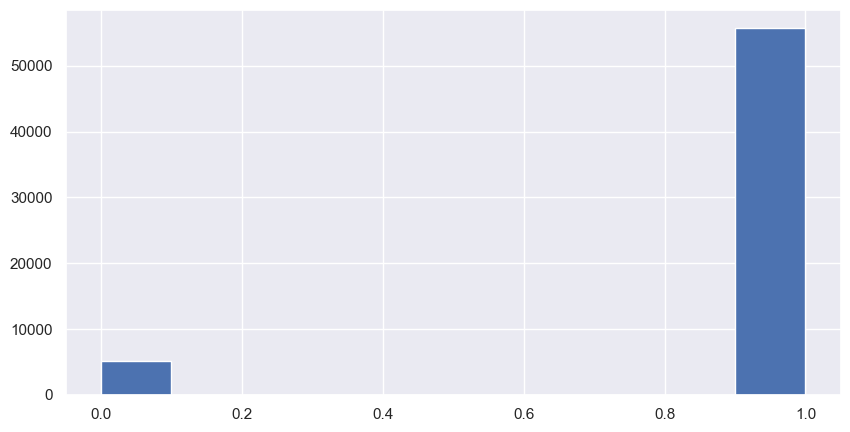

In [58]:
data.is_open.hist(figsize = (10,5))

Unique Value
 [1.36959351 1.         3.         4.         2.         5.
 6.         7.        ]
Value Counts
 milestones
1.369594    27759
1.000000    23800
2.000000     6844
3.000000     1957
4.000000      330
5.000000       80
6.000000       25
7.000000        3
Name: count, dtype: int64


<Axes: xlabel='milestones', ylabel='count'>

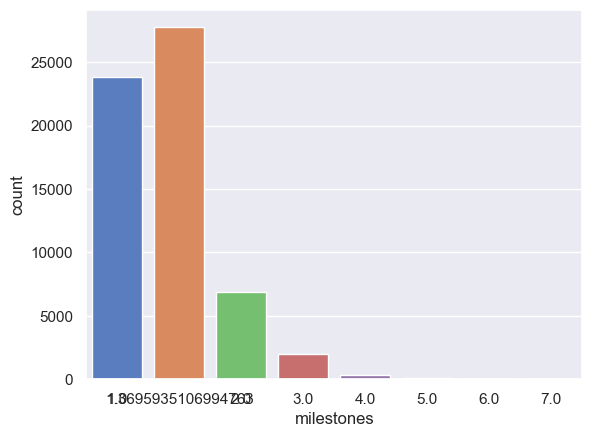

In [59]:
print('Unique Value\n',data['milestones'].unique())
print('Value Counts\n',data['milestones'].value_counts())
# Above code will return unique values of attributes and its count

# Below code will create a count plot
sns.countplot(data=data,x='milestones', palette='muted')



Unique Value
 [0 1]
Value Counts
 category_consulting
0    58018
1     2780
Name: count, dtype: int64


<Axes: xlabel='category_consulting', ylabel='count'>

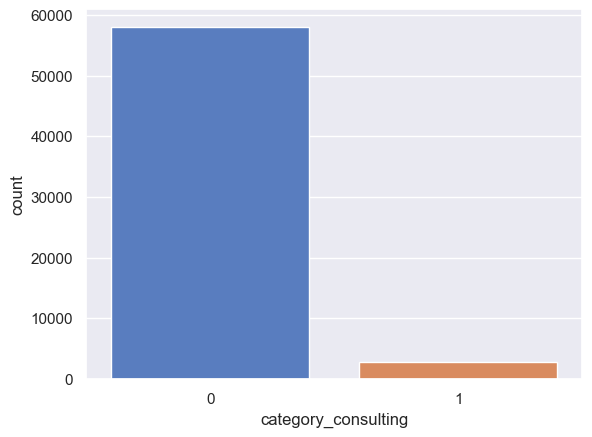

In [60]:
print('Unique Value\n',data['category_consulting'].unique())
print('Value Counts\n',data['category_consulting'].value_counts())
# Above code will return unique values of attributes and its count

# Below code will create a count plot
sns.countplot(data=data,x='category_consulting', palette='muted')



Unique Value
 [0 1]
Value Counts
 category_biotech
0    58729
1     2069
Name: count, dtype: int64


<Axes: xlabel='category_biotech', ylabel='count'>

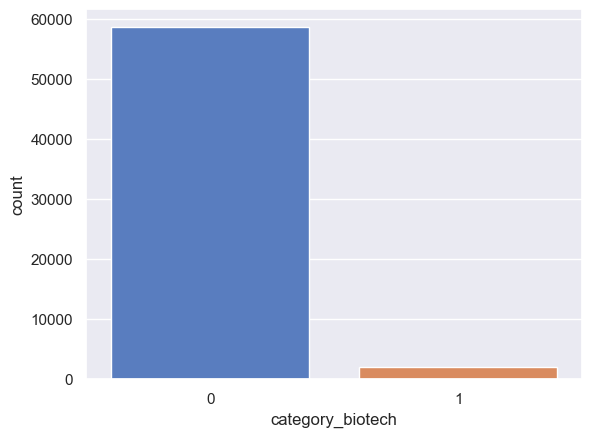

In [61]:
print('Unique Value\n',data['category_biotech'].unique())
print('Value Counts\n',data['category_biotech'].value_counts())
# Above code will return unique values of attributes and its count

# Below code will create a count plot
sns.countplot(data=data,x='category_biotech', palette='muted')



Unique Value
 [0 1]
Value Counts
 category_ecommerce
0    55923
1     4875
Name: count, dtype: int64


<Axes: xlabel='category_ecommerce', ylabel='count'>

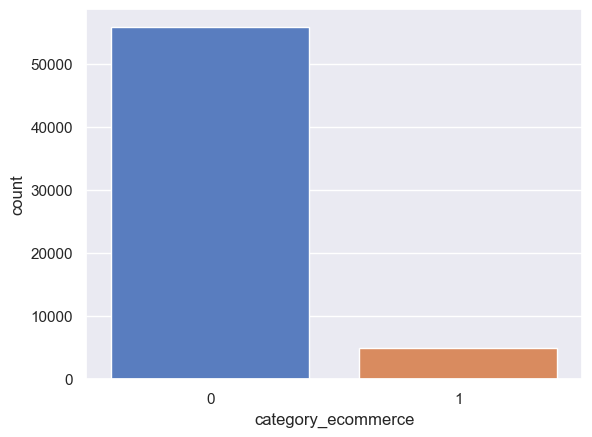

In [62]:
print('Unique Value\n',data['category_ecommerce'].unique())
print('Value Counts\n',data['category_ecommerce'].value_counts())
# Above code will return unique values of attributes and its count

# Below code will create a count plot
sns.countplot(data=data,x='category_ecommerce', palette='muted')



Unique Value
 [0 1]
Value Counts
 category_enterprise
0    58257
1     2541
Name: count, dtype: int64


<Axes: xlabel='category_enterprise', ylabel='count'>

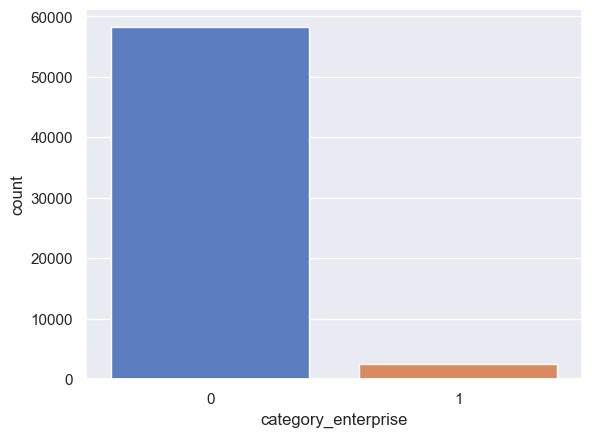

In [63]:
print('Unique Value\n',data['category_enterprise'].unique())
print('Value Counts\n',data['category_enterprise'].value_counts())
# Above code will return unique values of attributes and its count

# Below code will create a count plot
sns.countplot(data=data,x='category_enterprise', palette='muted')



Unique Value
 [0 1]
Value Counts
 category_games_video
0    57975
1     2823
Name: count, dtype: int64


<Axes: xlabel='category_games_video', ylabel='count'>

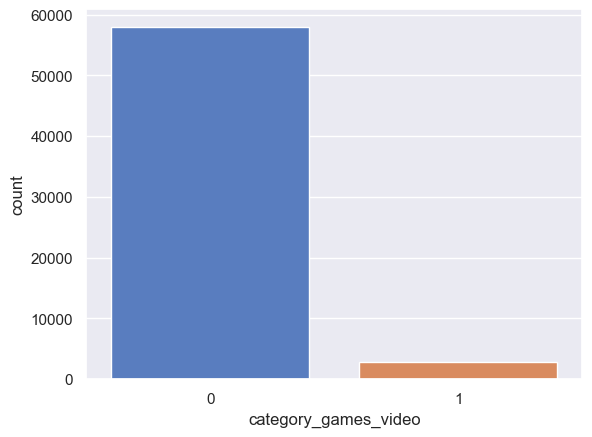

In [64]:
print('Unique Value\n',data['category_games_video'].unique())
print('Value Counts\n',data['category_games_video'].value_counts())
# Above code will return unique values of attributes and its count

# Below code will create a count plot
sns.countplot(data=data,x='category_games_video', palette='muted')



Unique Value
 [0 1]
Value Counts
 category_mobile
0    57022
1     3776
Name: count, dtype: int64


<Axes: xlabel='category_mobile', ylabel='count'>

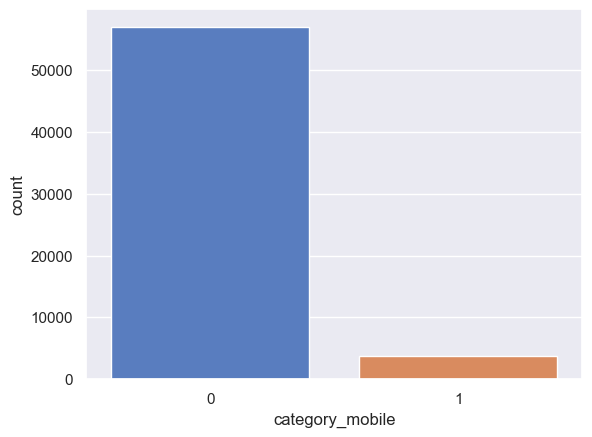

In [65]:
print('Unique Value\n',data['category_mobile'].unique())
print('Value Counts\n',data['category_mobile'].value_counts())
# Above code will return unique values of attributes and its count

# Below code will create a count plot
sns.countplot(data=data,x='category_mobile', palette='muted')



Unique Value
 [1 0]
Value Counts
 is_open
1    55722
0     5076
Name: count, dtype: int64


<Axes: xlabel='is_open', ylabel='count'>

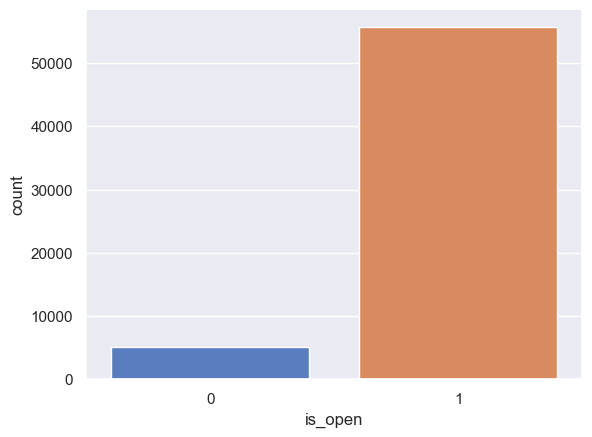

In [66]:
print('Unique Value\n',data['is_open'].unique())
print('Value Counts\n',data['is_open'].value_counts())
# Above code will return unique values of attributes and its count

# Below code will create a count plot
sns.countplot(data=data,x='is_open', palette='muted')



***Categorical Variables***

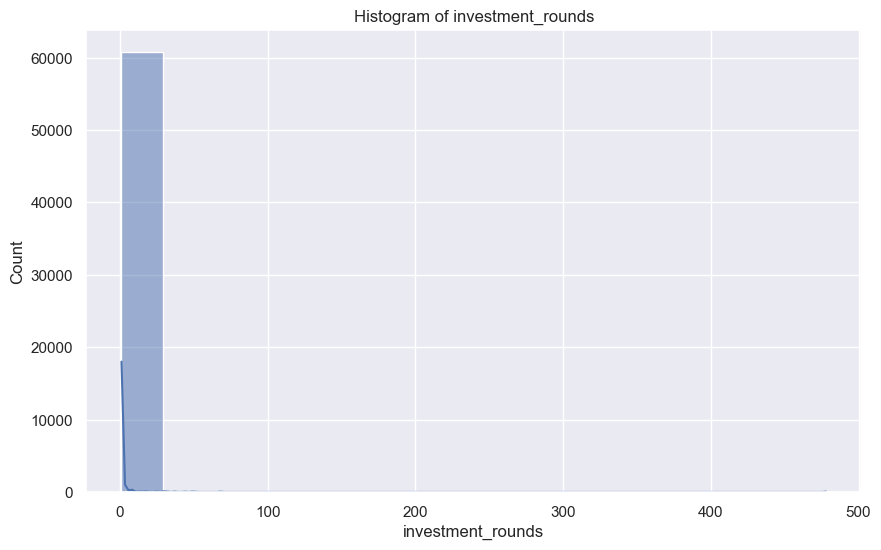

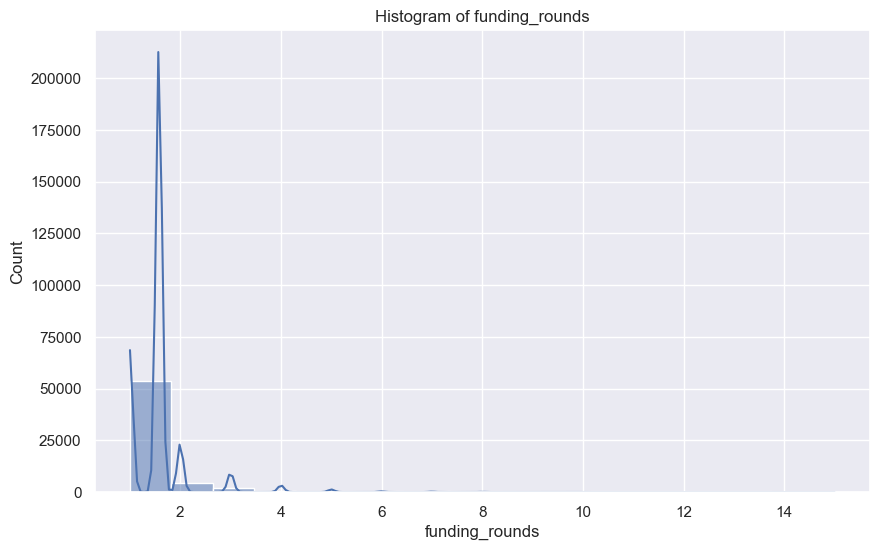

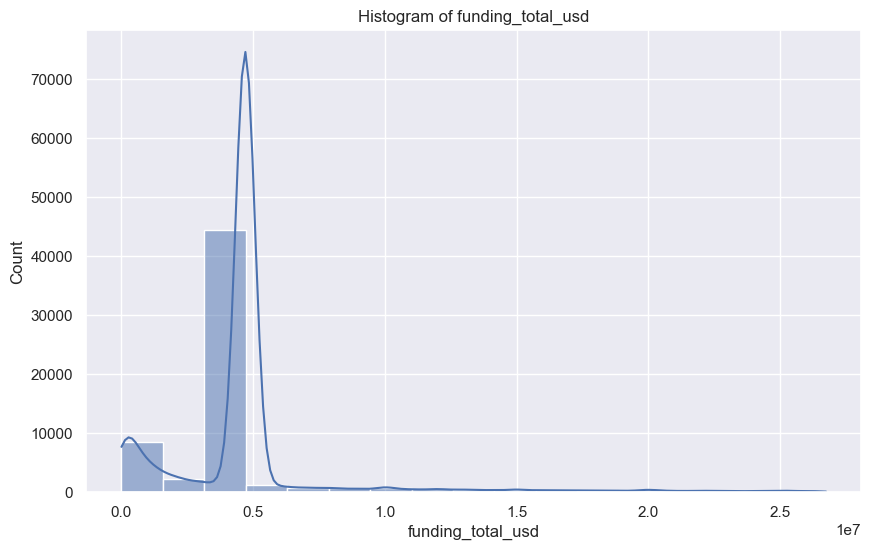

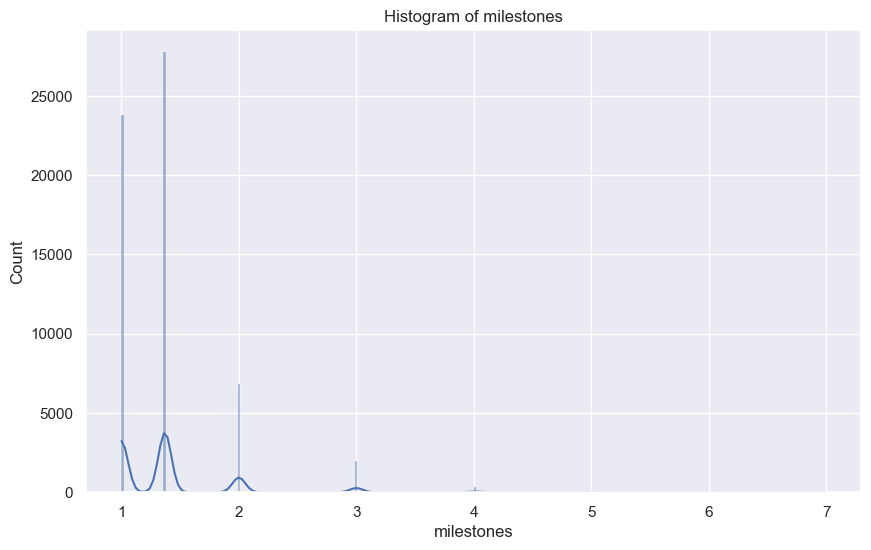

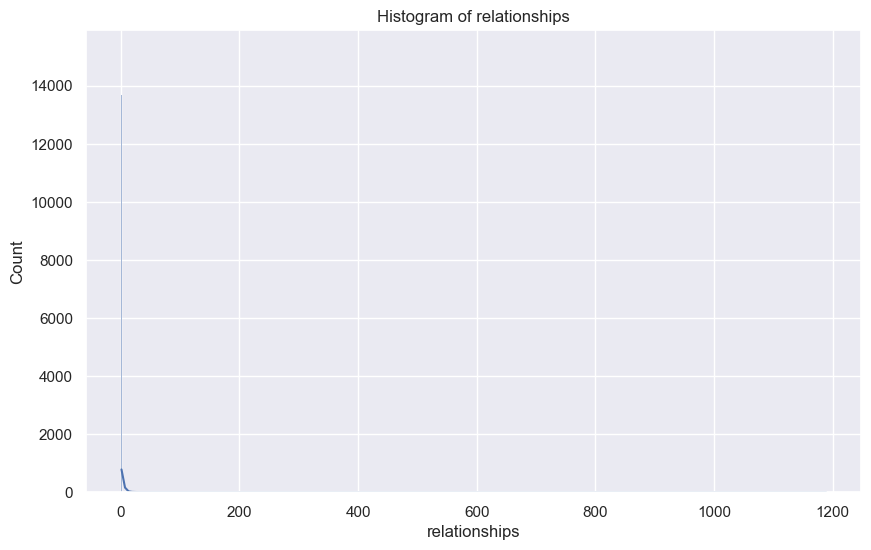

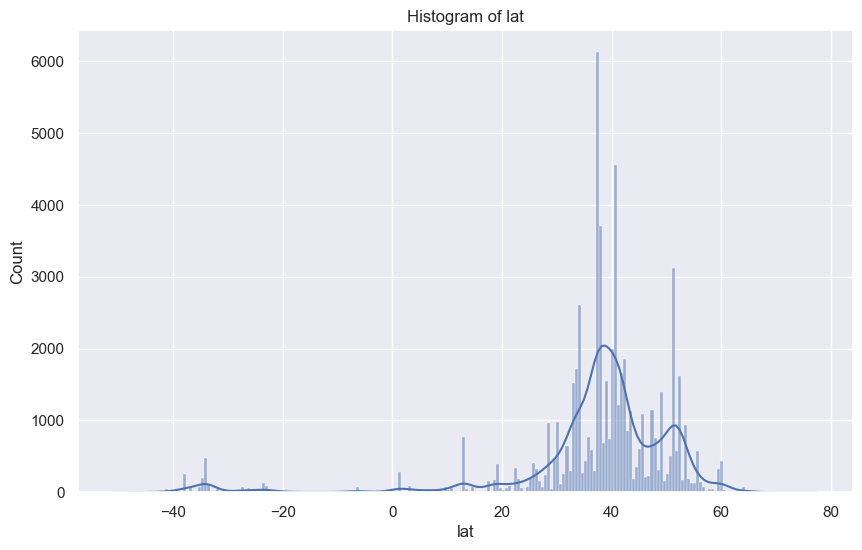

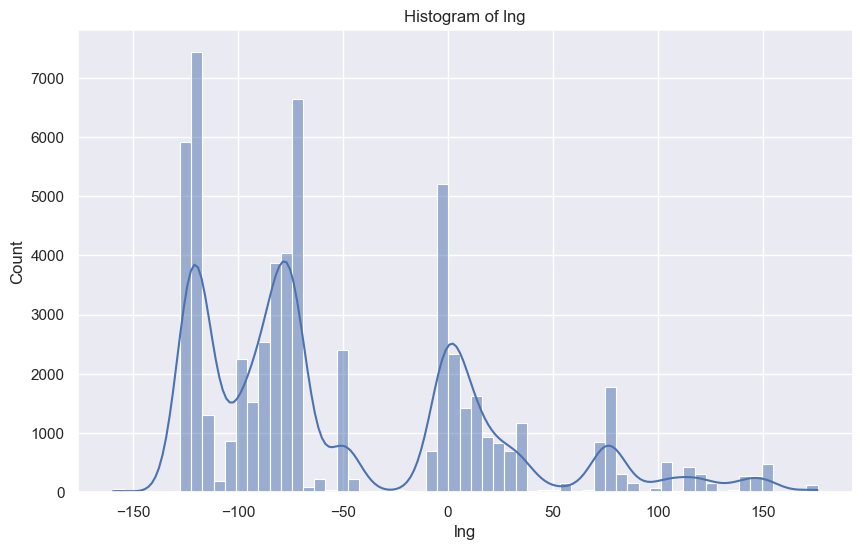

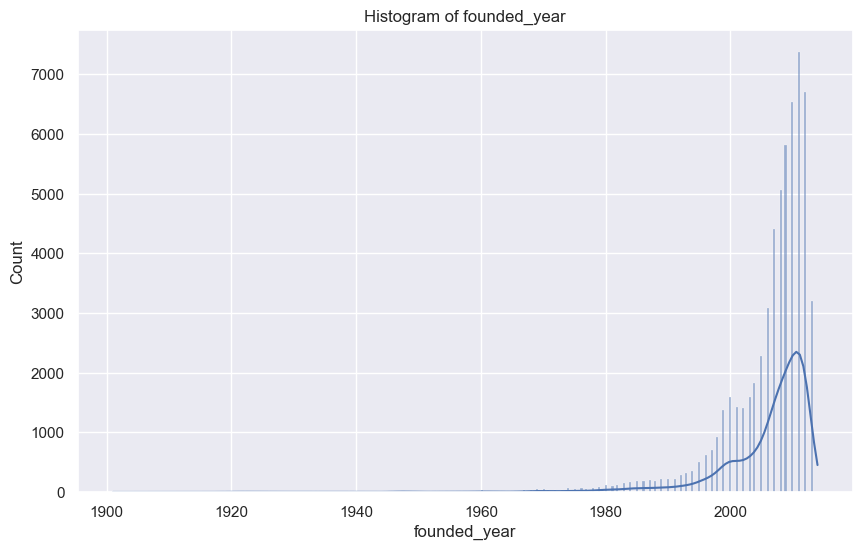

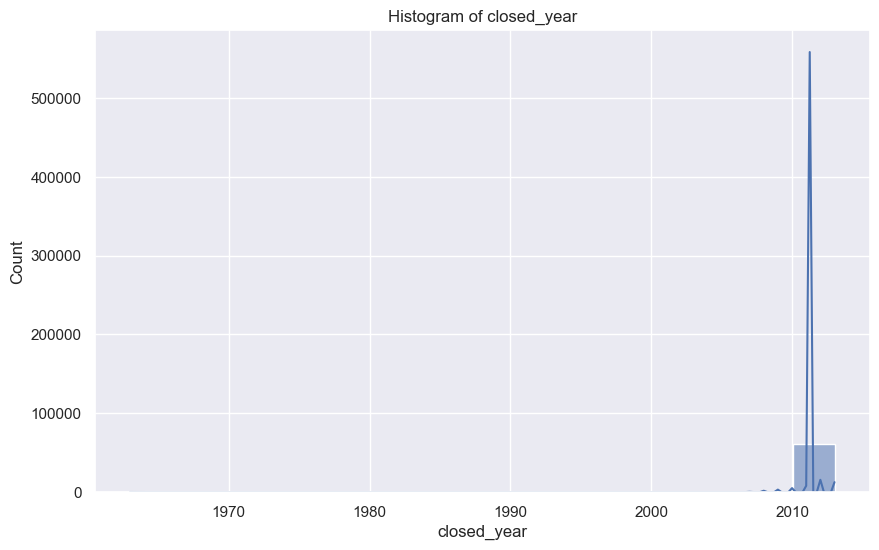

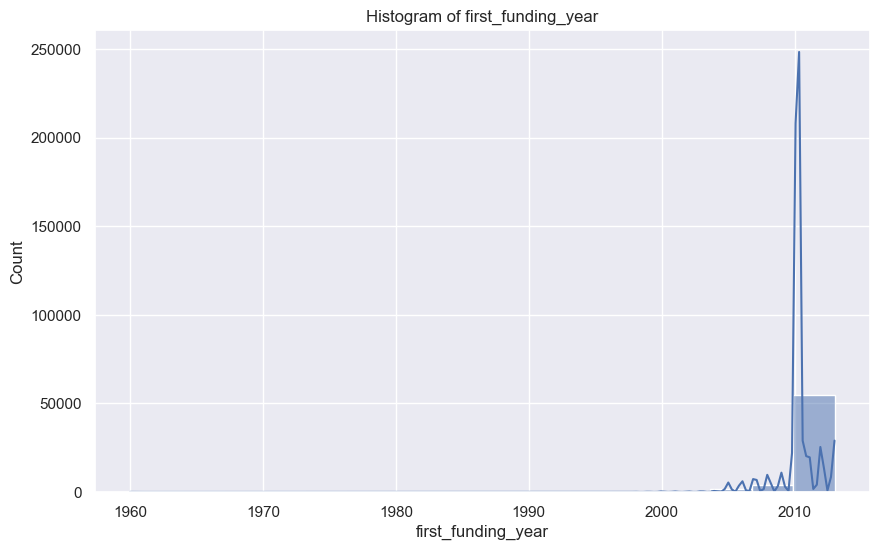

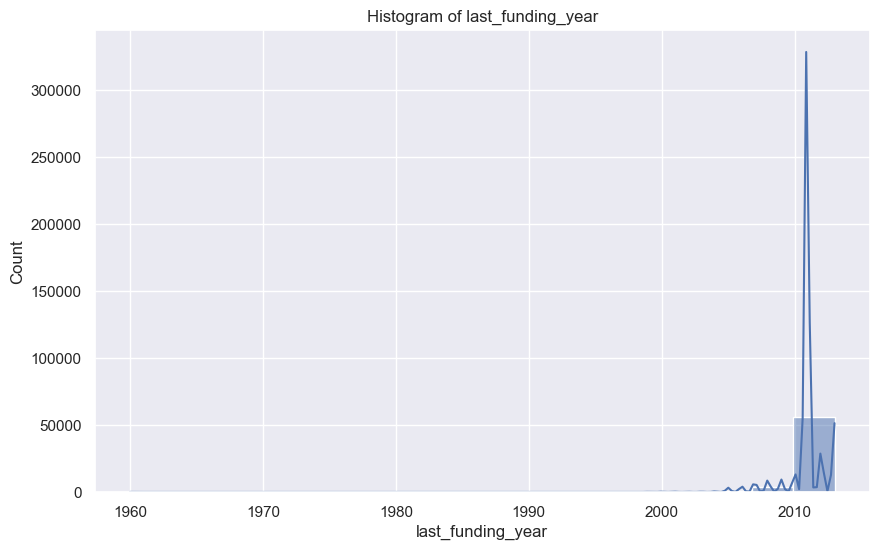

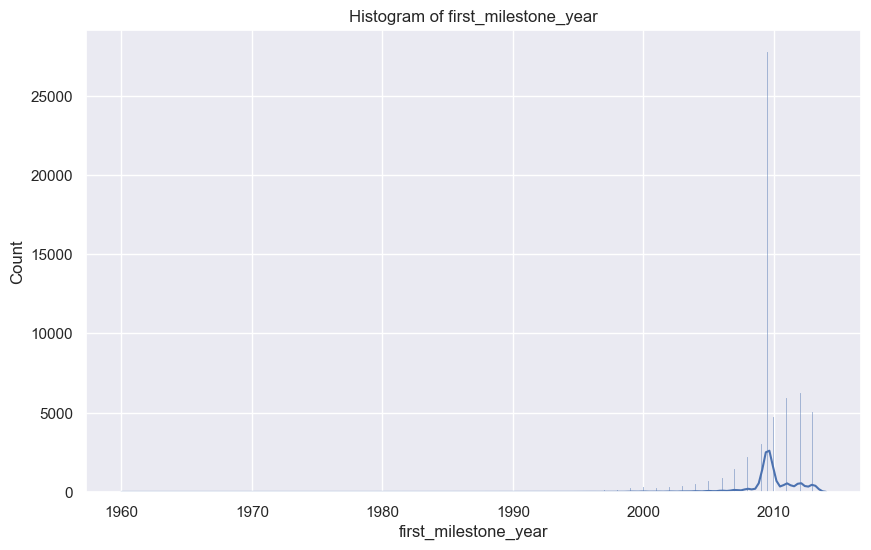

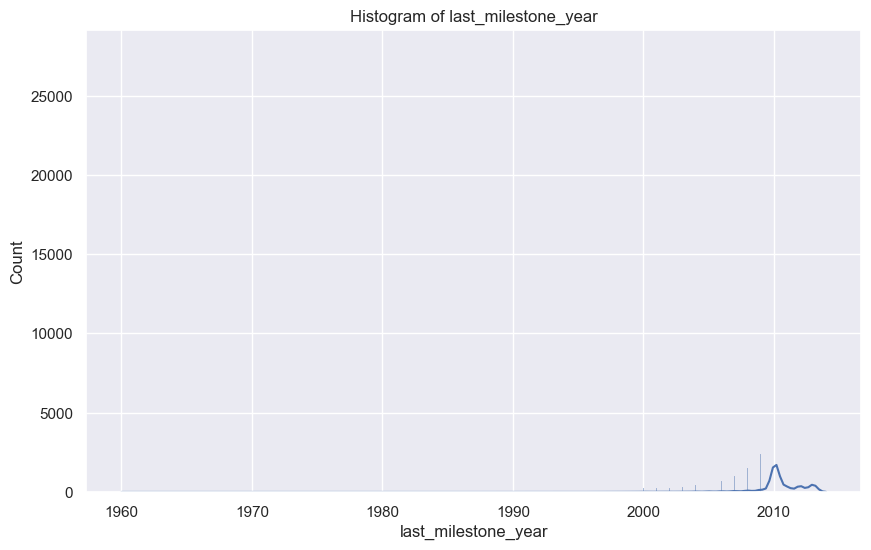

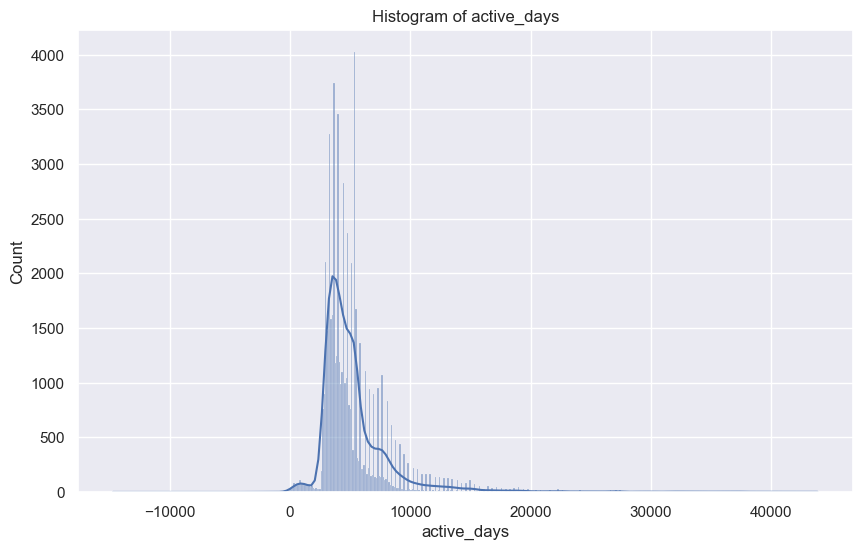

KeyError: 0

<Figure size 1000x600 with 0 Axes>

In [67]:
# Numerical variables
numerical_cols = ['investment_rounds', 'funding_rounds', 'funding_total_usd', 'milestones', 'relationships', 'lat', 'lng', 'founded_year', 'closed_year', 'first_funding_year', 'last_funding_year', 'first_milestone_year', 'last_milestone_year', 'active_days']
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

# Categorical variables
categorical_cols = ['status', 'category_Other', 'category_advertising', 'category_biotech', 'category_consulting', 'category_ecommerce', 'category_enterprise', 'category_games_video', 'category_mobile', 'category_other', 'category_software', 'category_web', 'category_AUS', 'category_CAN', 'category_DEU', 'category_ESP', 'category_FRA', 'category_GBR', 'category_IND', 'category_ISR', 'category_NLD', 'category_Other.1', 'category_USA', 'is_open']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data[col])
    plt.title(f'Bar plot of {col}')
    plt.show()



<center>
<h1 style='font-family: Arial; color: #ff9900; text-align: center; text-shadow: 2px 2px 4px #000000;'><b>Bivariate Analysis
</h1>
    


**Numerical-Numerical Relationship**

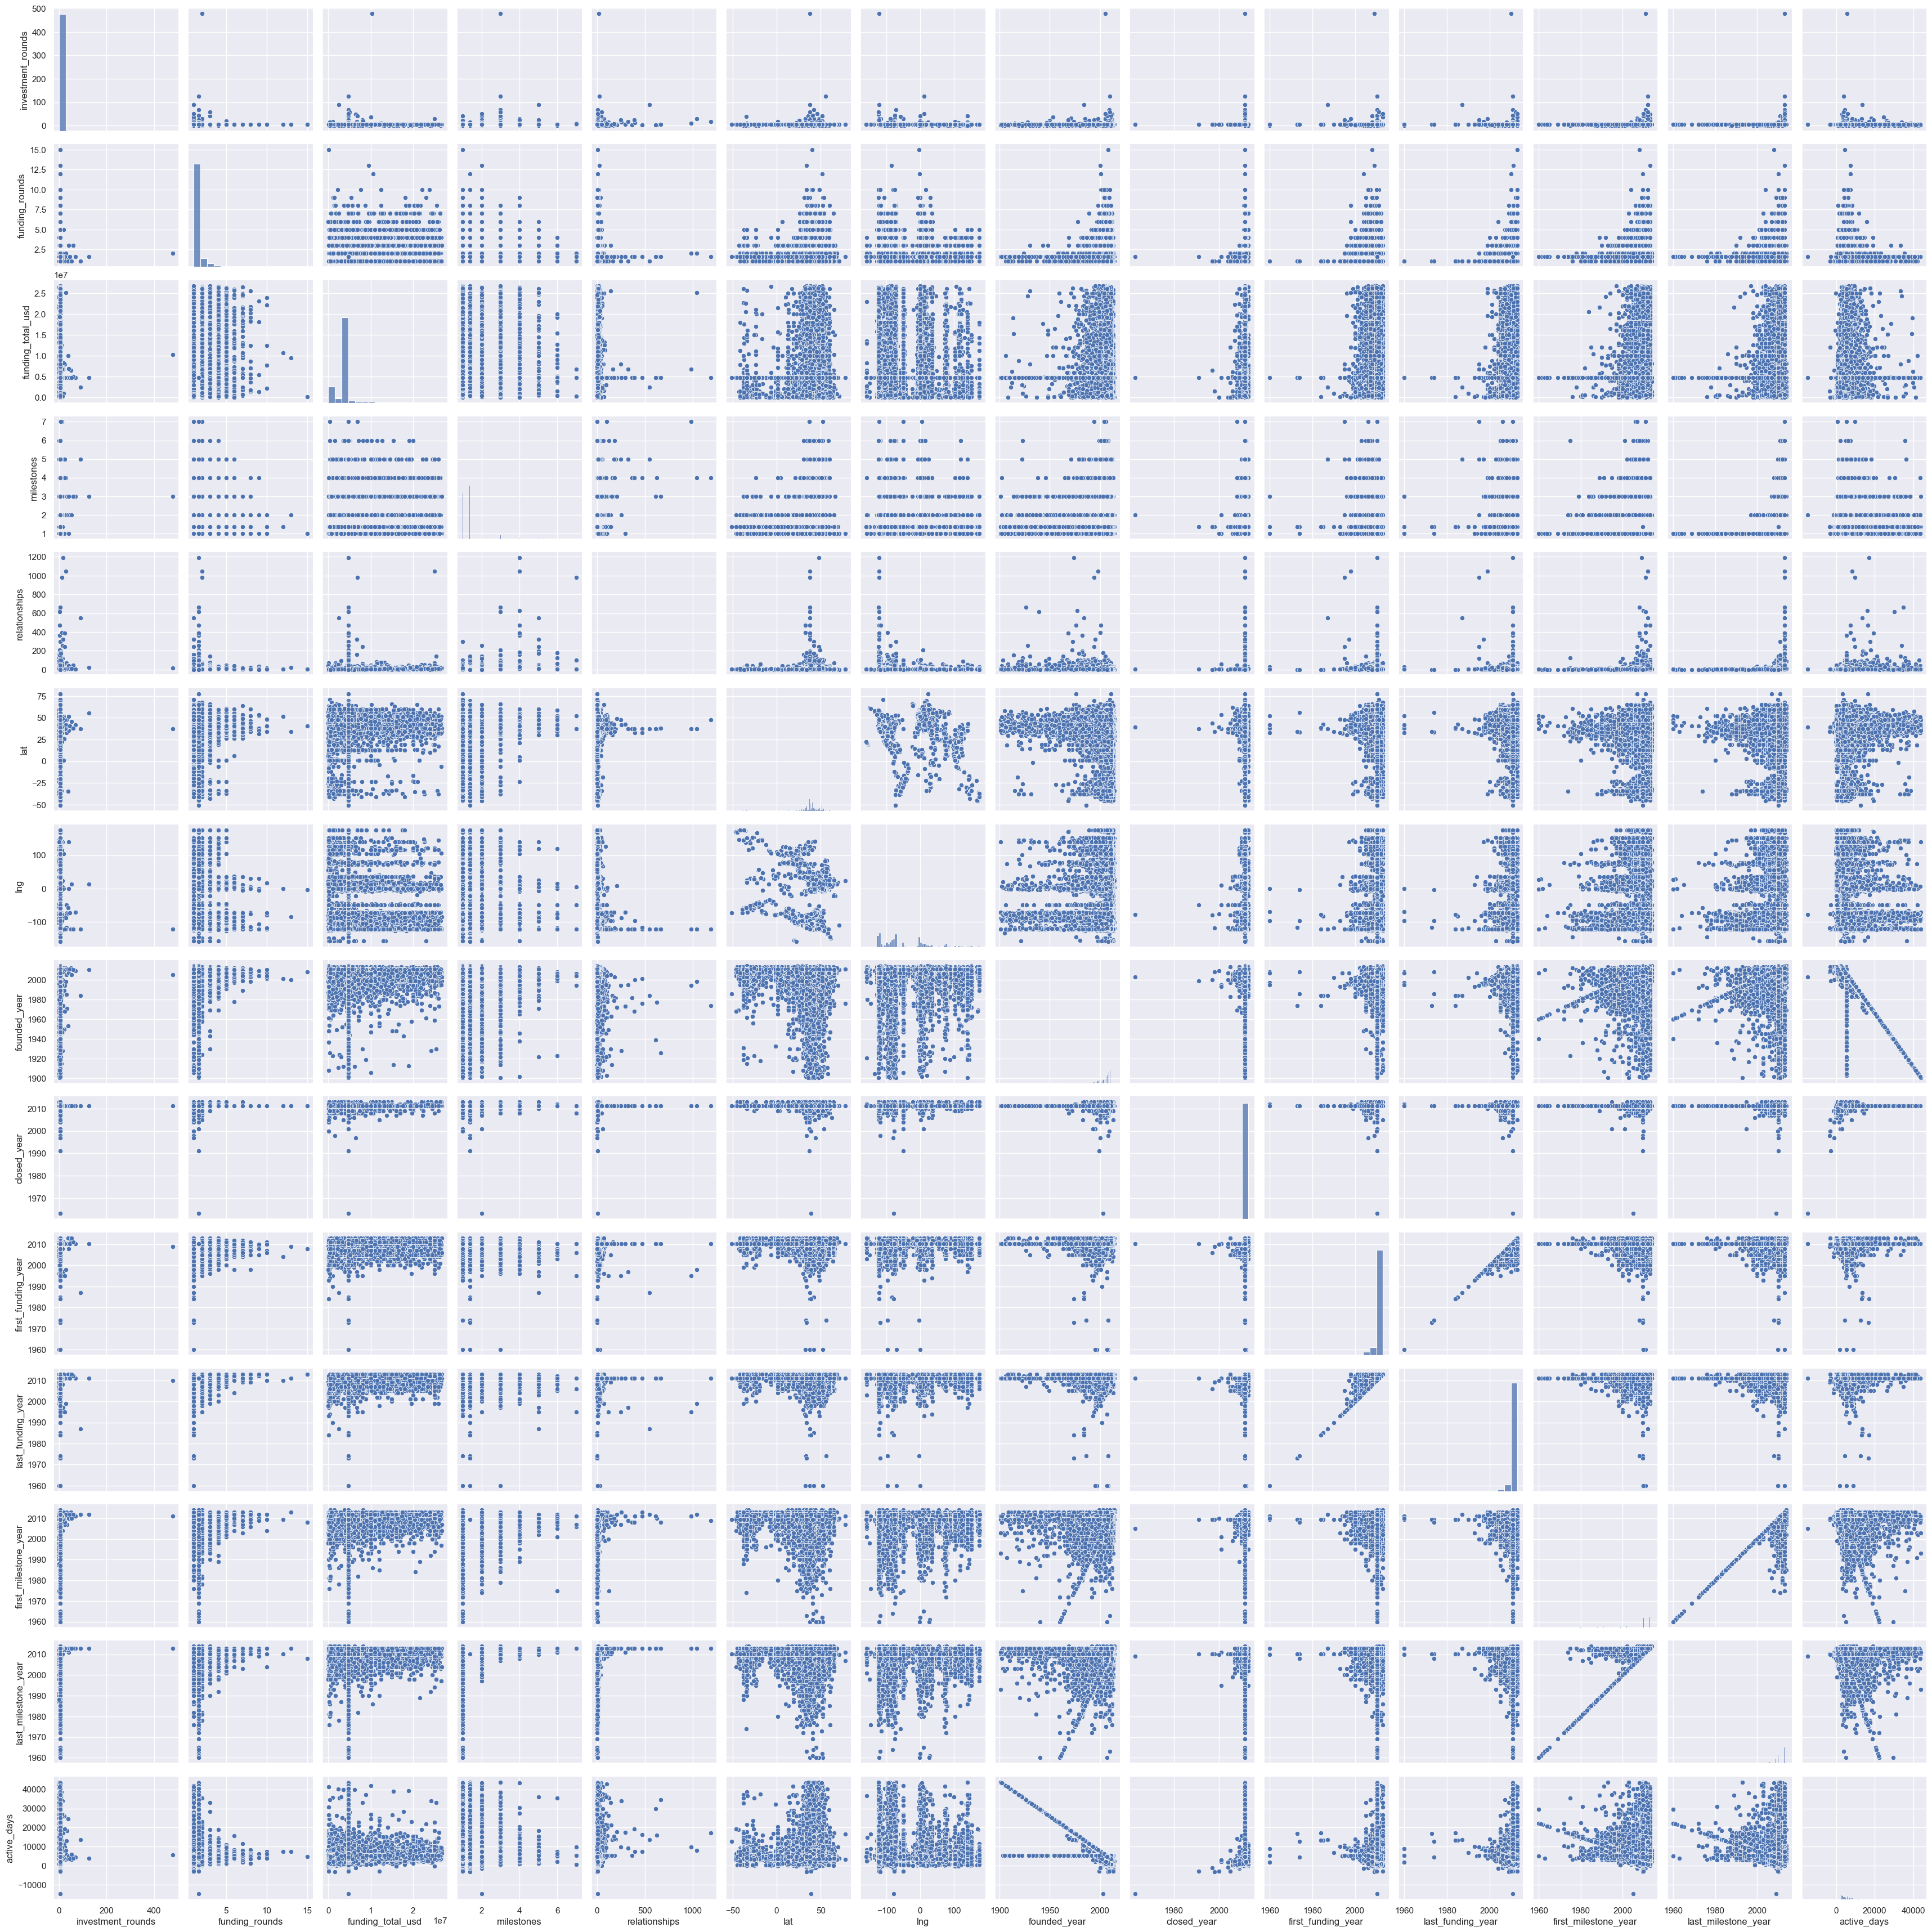

In [87]:
# Select only numerical columns
numerical_columns = ['investment_rounds', 'funding_rounds', 'funding_total_usd', 'milestones', 
                     'relationships', 'lat', 'lng', 'founded_year', 'closed_year', 
                     'first_funding_year', 'last_funding_year', 'first_milestone_year', 
                     'last_milestone_year', 'active_days']

# Create pairplot
sns.pairplot(data[numerical_columns])
plt.show()


**Categorical-Numerical Relationships**

KeyError: 'status'

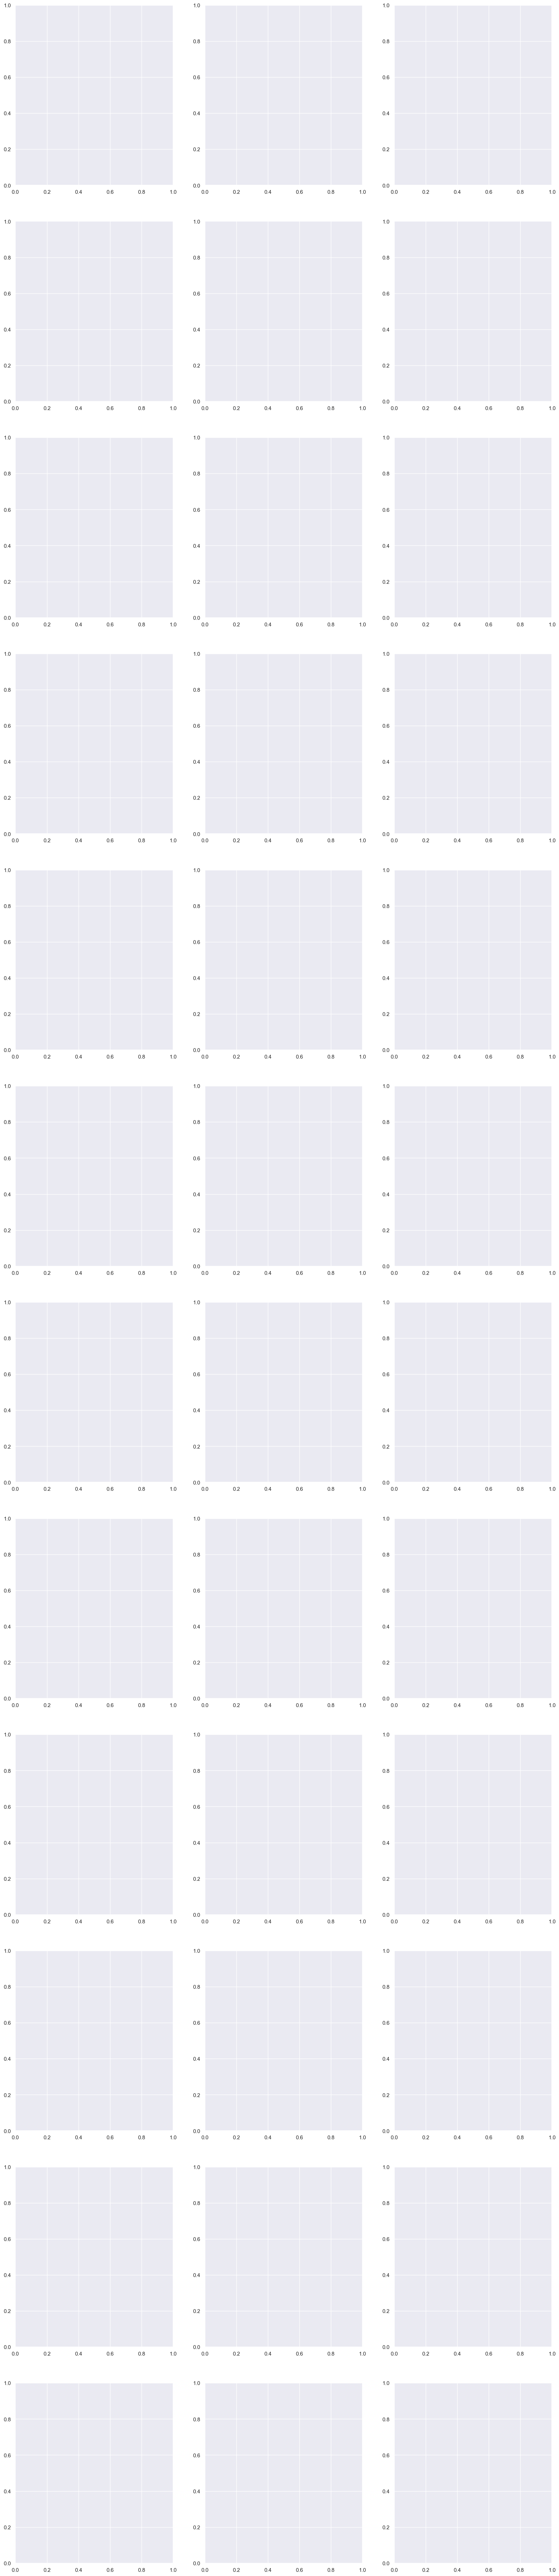

In [88]:
# Select all numerical columns
numerical_columns = ['investment_rounds', 'funding_rounds', 'funding_total_usd', 'milestones', 
                     'relationships', 'lat', 'lng', 'founded_year', 'closed_year', 
                     'first_funding_year', 'last_funding_year', 'first_milestone_year', 
                     'last_milestone_year', 'active_days']

# Select all categorical columns
categorical_columns = ['status', 'category_advertising', 'category_biotech',
                       'category_consulting', 'category_ecommerce', 'category_enterprise',
                       'category_games_video', 'category_mobile', 'category_other',
                       'category_software', 'category_web', 'category_AUS', 'category_CAN',
                       'category_DEU', 'category_ESP', 'category_FRA', 'category_GBR',
                       'category_IND', 'category_ISR', 'category_NLD',
                       'category_USA', 'is_open']

# Calculate number of rows needed for subplots
num_rows = (len(numerical_columns) + len(categorical_columns) - 1) // 3 + 1

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 8 * num_rows))

# Flatten axes for easier indexing
axes = axes.flatten()

# Loop through numerical columns
for i, num_col in enumerate(numerical_columns):
    # Loop through categorical columns
    for j, cat_col in enumerate(categorical_columns):
        # Calculate subplot index
        idx = i * len(categorical_columns) + j
        if idx >= len(axes):
            break
        # Create box plot or violin plot based on the number of categories
        if len(data[cat_col].unique()) > 10:
            sns.violinplot(x=cat_col, y=num_col, data=data, ax=axes[idx])
        else:
            sns.boxplot(x=cat_col, y=num_col, data=data, ax=axes[idx])
        axes[idx].set_title(f'{cat_col} vs {num_col}')
        axes[idx].set_xlabel('')
        axes[idx].set_ylabel('')
        axes[idx].tick_params(axis='x', rotation=45)

# Remove empty subplots
for idx in range(len(numerical_columns) * len(categorical_columns), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout()
plt.show()



<center>
<h1 style='font-family: Arial; color: #ff9900; text-align: center; text-shadow: 2px 2px 4px #000000;'><b>Multivariate Analysis
</h1>
    
**Pairwise Correlation**

In [ ]:
# Select all numerical columns
numerical_columns = ['investment_rounds', 'funding_rounds', 'funding_total_usd', 'milestones', 
                     'relationships', 'lat', 'lng', 'founded_year', 'closed_year', 
                     'first_funding_year', 'last_funding_year', 'first_milestone_year', 
                     'last_milestone_year', 'active_days']

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Pairwise Correlation Heatmap of Numerical Variables')
plt.show()


**Multivariate Scatter Plot** <br>
Pair plot to visualize pairwise relationships between numerical variables

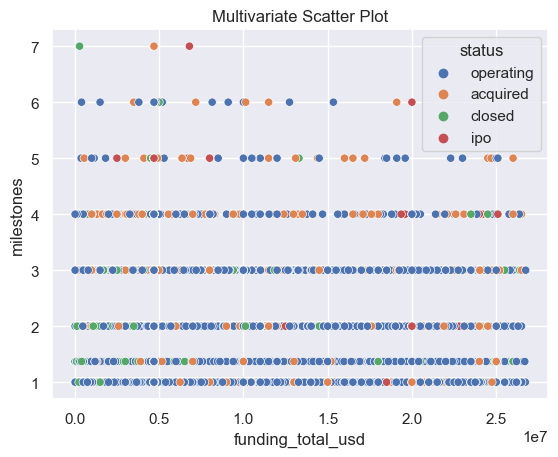

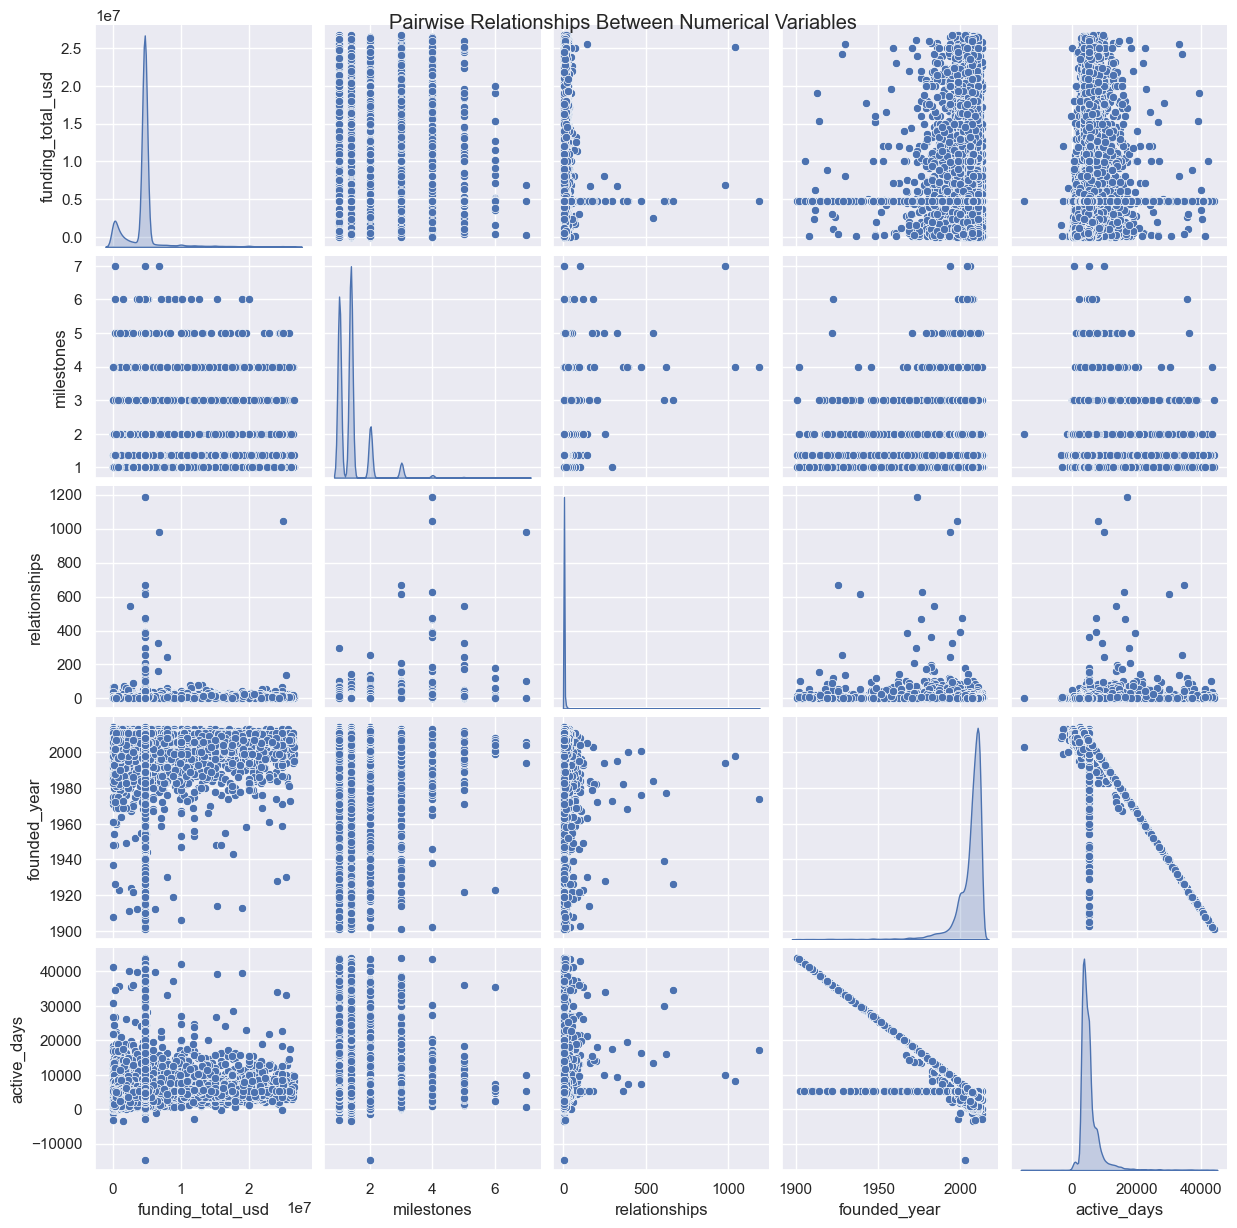

In [75]:
# Multivariate Scatter Plot
sns.scatterplot(x='funding_total_usd', y='milestones', hue='status', data=data)
plt.title('Multivariate Scatter Plot')
plt.show()

# Pair Plot
sns.pairplot(data=data[['funding_total_usd', 'milestones', 'relationships', 'founded_year', 'active_days']], diag_kind='kde')
plt.suptitle('Pairwise Relationships Between Numerical Variables')
plt.show()


<center>
<h1 style='font-family: Arial; color: #ff9900; text-align: center; text-shadow: 2px 2px 4px #000000;'><b>Feature Engineering
</h1>
    


In [76]:
#pip install imbalanced-learn

In [77]:
# Convert date columns to datetime format
data['founded_at'] = pd.to_datetime(data['founded_at'], errors='coerce')
data['first_investment_at'] = pd.to_datetime(data['first_investment_at'], errors='coerce')
data['last_investment_at'] = pd.to_datetime(data['last_investment_at'], errors='coerce')
data['first_funding_at'] = pd.to_datetime(data['first_funding_at'], errors='coerce')
data['last_funding_at'] = pd.to_datetime(data['last_funding_at'], errors='coerce')
data['first_milestone_at'] = pd.to_datetime(data['first_milestone_at'], errors='coerce')
data['last_milestone_at'] = pd.to_datetime(data['last_milestone_at'], errors='coerce')

# Check the changes
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 60798 entries, 5 to 196552
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   status                60798 non-null  object        
 1   founded_at            60798 non-null  datetime64[ns]
 2   first_investment_at   664 non-null    datetime64[ns]
 3   last_investment_at    664 non-null    datetime64[ns]
 4   investment_rounds     60798 non-null  float64       
 5   first_funding_at      19962 non-null  datetime64[ns]
 6   last_funding_at       19962 non-null  datetime64[ns]
 7   funding_rounds        60798 non-null  float64       
 8   funding_total_usd     60798 non-null  float64       
 9   first_milestone_at    33039 non-null  datetime64[ns]
 10  last_milestone_at     33039 non-null  datetime64[ns]
 11  milestones            60798 non-null  float64       
 12  relationships         60798 non-null  float64       
 13  lat                 

In [78]:
data_copy = data.copy()

In [79]:
# Filter out numeric columns
categorical_columns = data.select_dtypes(exclude=[np.number]).columns

# Display the categorical columns
print(categorical_columns)


Index(['status', 'founded_at', 'first_investment_at', 'last_investment_at',
       'first_funding_at', 'last_funding_at', 'first_milestone_at',
       'last_milestone_at'],
      dtype='object')


In [80]:
data.drop('status', axis=1, inplace=True)

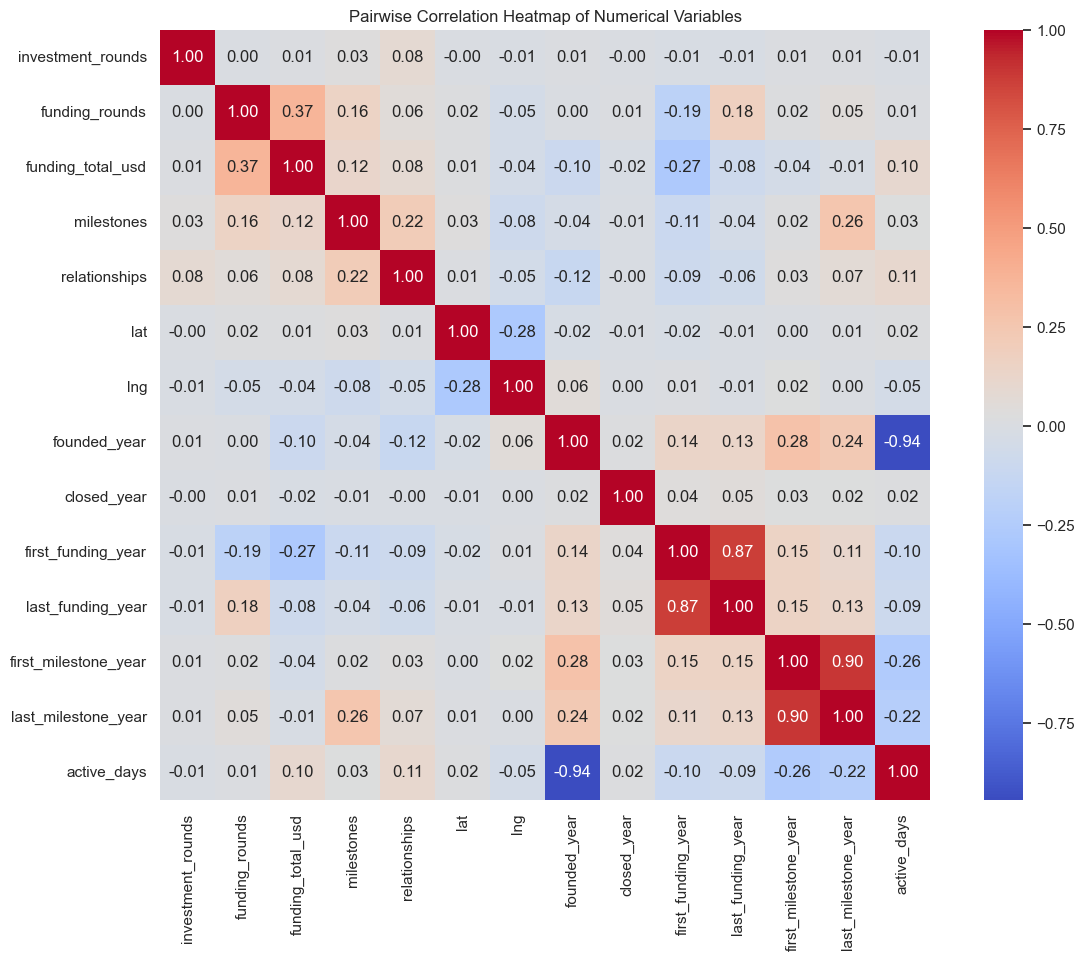

In [81]:
# Filter out non-numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Pairwise Correlation Heatmap of Numerical Variables')
plt.show()

In [82]:
(data.isnull().sum() / len(data)) * 100

founded_at               0.000000
first_investment_at     98.907859
last_investment_at      98.907859
investment_rounds        0.000000
first_funding_at        67.166683
last_funding_at         67.166683
funding_rounds           0.000000
funding_total_usd        0.000000
first_milestone_at      45.657752
last_milestone_at       45.657752
milestones               0.000000
relationships            0.000000
lat                      0.000000
lng                      0.000000
founded_year             0.000000
closed_year              0.000000
first_funding_year       0.000000
last_funding_year        0.000000
first_milestone_year     0.000000
last_milestone_year      0.000000
category_Other           0.000000
category_advertising     0.000000
category_biotech         0.000000
category_consulting      0.000000
category_ecommerce       0.000000
category_enterprise      0.000000
category_games_video     0.000000
category_mobile          0.000000
category_other           0.000000
category_softw

In [83]:
columns = ['first_investment_at','last_investment_at', 'first_funding_at','last_funding_at','first_milestone_at','last_milestone_at']
data = data.drop(columns=columns, axis = 1)

In [84]:
data

founded_at  investment_rounds  funding_rounds  funding_total_usd  \
5      2007-06-27           4.390977        1.574172       4.696817e+06   
6      2008-08-20           4.390977        1.574172       4.696817e+06   
12     2008-08-01           4.390977        1.574172       4.696817e+06   
13     2007-10-01           4.390977        1.000000       5.000000e+06   
15     2008-01-01           4.390977        1.574172       4.696817e+06   
...           ...                ...             ...                ...   
196548 2007-01-01           4.390977        1.574172       4.696817e+06   
196549 2007-11-01           4.390977        1.000000       7.500000e+05   
196550 1959-01-01           4.390977        1.574172       4.696817e+06   
196551 2008-07-01           4.390977        1.574172       4.696817e+06   
196552 2007-09-01           4.390977        1.000000       4.750000e+05   

        milestones  relationships        lat         lng  founded_year  \
5         1.369594       2.000000  30.427755   -9.598107          2007   
6         1.369594       3.952083  22.307159   73.181219          2008   
12        1.000000       2.000000  35.686975 -105.937799          2008   
13        3.000000      14.000000  37.386052 -122.083851          2007   
15        1.000000       3.000000  33.078655 -116.601964          2008   
...            ...            ...        ...         ...           ...   
196548    2.000000       5.000000  37.774929 -122.419415          2007   
196549    1.000000      14.000000  37.338208 -121.886329          2007   
196550    3.000000      44.000000  38.882334  -77.171091          1959   
196551    1.369594       1.000000  34.052234 -118.243685          2008   
196552    2.000000       1.000000  34.035633 -118.515590          2007   

        closed_year  ...  category_ESP  category_FRA  category_GBR  \
5       2011.299745  ...             0             0             0   
6       2011.299745  ...             0             0             0   
12      2011.299745  ...             0             0             0   
13      2011.299745  ...             0             0             0   
15      2011.299745  ...             0             0             0   
...             ...  ...           ...           ...           ...   
196548  2011.299745  ...             0             0             0   
196549  2011.299745  ...             0             0             0   
196550  2011.299745  ...             0             0             0   
196551  2011.299745  ...             0             0             0   
196552  2011.299745  ...             0             0             0   

        category_IND  category_ISR  category_NLD  category_Other  \
5                  0             0             0               1   
6                  1             0             0               0   
12                 0             0             0               0   
13                 0             0             0               0   
15                 0             0             0               0   
...              ...           ...           ...             ...   
196548             0             0             0               0   
196549             0             0             0               0   
196550             0             0             0               0   
196551             0             0             0               0   
196552             0             0             0               0   

        category_USA  is_open   active_days  
5                  0        1   4937.000000  
6                  0        1   4517.000000  
12                 1        1   4536.000000  
13                 1        0   5342.945121  
15                 1        1   4749.000000  
...              ...      ...           ...  
196548             1        1   5114.000000  
196549             1        1   4810.000000  
196550             1        1  22646.000000  
196551             1        1   4567.000000  
196552             1        1   4871.000000  

[60798

In [89]:
columns = [ 'founded_at']
data = data.drop(columns=columns, axis = 1)

KeyError: "['founded_at'] not found in axis"

In [91]:
#data.to_excel("C:\\Users\\Hp\\Downloads\\technolabs\\newdata2.xlsx" ,index=False)

## Feature Selection
### MI- Score

In [92]:
from sklearn.feature_selection import mutual_info_classif

X = data.drop('is_open', axis=1)    
y = data['is_open']              # Target variable

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Calculate MI scores
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)


# Create a DataFrame to display MI scores for each feature
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Display the MI scores
#print(mi_df)
mi_df.sort_values(by='MI Score', ascending=False)

Feature  MI Score
35           active_days  0.262544
8            closed_year  0.078629
10     last_funding_year  0.040481
9     first_funding_year  0.037411
7           founded_year  0.017092
2      funding_total_usd  0.016056
1         funding_rounds  0.015864
34          category_USA  0.015319
11  first_milestone_year  0.014665
0      investment_rounds  0.014573
5                    lat  0.012263
6                    lng  0.012192
3             milestones  0.012051
12   last_milestone_year  0.010042
4          relationships  0.006926
13        category_Other  0.003279
30          category_IND  0.002234
33        category_Other  0.001579
22     category_software  0.001105
27          category_ESP  0.001021
18   category_enterprise  0.001006
26          category_DEU  0.000974
23          category_web  0.000503
20       category_mobile  0.000503
14  category_advertising  0.000309
16   category_consulting  0.000242
17    category_ecommerce  0.000232
21        category_other  0.000173
19  category_games_video  0.000091
32          category_NLD  0.000089
24          category_AUS  0.000000
25          category_CAN  0.000000
28          category_FRA  0.000000
29          category_GBR  0.000000
31          category_ISR  0.000000
15      category_biotech  0.000000

In [93]:
# List of columns to select
selected_columns = ['active_days', 'closed_year', 'last_funding_year', 'first_funding_year',
                     'founded_year', 'funding_total_usd', 'funding_rounds', 'category_USA',
                     'first_milestone_year', 'investment_rounds', 'lat']

# Create a new DataFrame with only the selected columns
mi_data = data[selected_columns].copy()

# Print the new DataFrame
print(mi_data)


         active_days  closed_year  last_funding_year  first_funding_year  \
5        4937.000000  2011.299745        2010.903216         2010.230538   
6        4517.000000  2011.299745        2010.903216         2010.230538   
12       4536.000000  2011.299745        2010.903216         2010.230538   
13       5342.945121  2011.299745        2008.000000         2008.000000   
15       4749.000000  2011.299745        2010.903216         2010.230538   
...              ...          ...                ...                 ...   
196548   5114.000000  2011.299745        2010.903216         2010.230538   
196549   4810.000000  2011.299745        2008.000000         2008.000000   
196550  22646.000000  2011.299745        2010.903216         2010.230538   
196551   4567.000000  2011.299745        2010.903216         2010.230538   
196552   4871.000000  2011.299745        2008.000000         2008.000000   

        founded_year  funding_total_usd  funding_rounds  category_USA  \
5             

### PCA

In [94]:
# Perform z-score standardization
scaler_standard = StandardScaler()
standardized_data = scaler_standard.fit_transform(data)
df_standardized = pd.DataFrame(standardized_data, columns=data.columns)

In [95]:
df_standardized

investment_rounds  funding_rounds  funding_total_usd    milestones  \
0          -4.162359e-16        0.000000           0.000000 -4.449332e-16   
1          -4.162359e-16        0.000000           0.000000 -4.449332e-16   
2          -4.162359e-16        0.000000           0.000000 -7.405918e-01   
3          -4.162359e-16       -1.025666           0.090824  3.267010e+00   
4          -4.162359e-16        0.000000           0.000000 -7.405918e-01   
...                  ...             ...                ...           ...   
60793      -4.162359e-16        0.000000           0.000000  1.263209e+00   
60794      -4.162359e-16       -1.025666          -1.182336 -7.405918e-01   
60795      -4.162359e-16        0.000000           0.000000  3.267010e+00   
60796      -4.162359e-16        0.000000           0.000000 -4.449332e-16   
60797      -4.162359e-16       -1.025666          -1.264716  1.263209e+00   

       relationships       lat       lng  founded_year   closed_year  \
0          -0.173661 -0.433187  0.571850      0.147349  1.983389e-12   
1           0.000000 -0.949442  1.761059      0.250014  1.983389e-12   
2          -0.173661 -0.098840 -0.812168      0.250014  1.983389e-12   
3           0.893879  0.009176 -1.044122      0.147349  1.983389e-12   
4          -0.084699 -0.264660 -0.965369      0.250014  1.983389e-12   
...              ...       ...       ...           ...           ...   
60793       0.093224  0.033899 -1.048943      0.147349  1.983389e-12   
60794       0.893879  0.006135 -1.041285      0.147349  1.983389e-12   
60795       3.562729  0.104300 -0.398905     -4.780568  1.983389e-12   
60796      -0.262622 -0.202766 -0.988954      0.250014  1.983389e-12   
60797      -0.262622 -0.203821 -0.992861      0.147349  1.983389e-12   

       first_funding_year  ...  category_ESP  category_FRA  category_GBR  \
0                 0.00000  ...     -0.121677     -0.143816     -0.299217   
1                 0.00000  ...     -0.121677     -0.143816     -0.299217   
2                 0.00000  ...     -0.121677     -0.143816     -0.299217   
3                -1.44859  ...     -0.121677     -0.143816     -0.299217   
4                 0.00000  ...     -0.121677     -0.143816     -0.299217   
...                   ...  ...           ...           ...           ...   
60793             0.00000  ...     -0.121677     -0.143816     -0.299217   
60794            -1.44859  ...     -0.121677     -0.143816     -0.299217   
60795             0.00000  ...     -0.121677     -0.143816     -0.299217   
60796             0.00000  ...     -0.121677     -0.143816     -0.299217   
60797            -1.44859  ...     -0.121677     -0.143816     -0.299217   

       category_IND  category_ISR  category_NLD  category_Other  category_USA  \
0         -0.227267      -0.11363      -0.10452        2.290682     -1.145491   
1          4.400116      -0.11363      -0.10452       -0.436551     -1.145491   
2         -0.227267      -0.11363      -0.10452       -0.436551      0.872988   
3         -0.227267      -0.11363      -0.10452       -0.436551      0.872988   
4         -0.227267      -0.11363      -0.10452       -0.436551      0.872988   
...             ...           ...           ...             ...           ...   
60793     -0.227267      -0.11363      -0.10452       -0.436551      0.872988   
60794     -0.227267      -0.11363      -0.10452       -0.436551      0.872988   
60795     -0.227267      -0.11363      -0.10452       -0.436551      0.872988   
60796     -0.227267      -0.11363      -0.10452       -0.436551      0.872988   
60797     -0.227267      -0.11363      -0.10452       -0.436551      0.872988   

        is_open   active_days  
0      0.301820 -1.168251e-01  
1      0.301820 -2.376950e-01  
2      0.301820 -2.322270e-01  
3     -3.313237  2.617393e-16  
4      0.301820 -1.709287e-01  
...         ...           ...  
60793  0.301820 -6.588707e-02  
60794  0.301820 -1.533738e-01  
60795  0.301820  4.979567e+00  
60796  0.30

In [96]:
n_components = 12
pca = PCA(n_components)
pca.fit(df_standardized)

x_pca = pca.transform(df_standardized)

df_pca = pd.DataFrame(data=x_pca, columns=[f'PC{i+1}' for i in range(n_components)])


In [97]:
df_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -1.102614  1.295838  0.235563  0.088898  0.109900 -0.413752 -0.330603   
1     -1.581888  2.154533  0.010540  1.183524 -0.527349 -0.462201 -1.523087   
2      0.690863 -0.683419 -0.609185 -0.771512 -1.066006 -0.765853 -0.219384   
3      2.253778 -1.159478  3.731100 -0.413931 -1.208933  1.697272 -0.205640   
4      0.720631 -0.698354 -0.409738 -0.828065 -1.021202 -0.042090  0.063829   
...         ...       ...       ...       ...       ...       ...       ...   
60793 -0.298971 -1.772182  0.580084  0.664244 -0.190618  0.150363  0.652338   
60794  0.567068 -1.113545  1.269821 -0.284918 -0.399551  2.657011 -1.622009   
60795  4.398755 -0.004735 -0.845923  5.060281  2.720789  3.142803  1.826899   
60796  0.396389 -1.272432 -0.410105  0.156556 -0.532350  0.144559 -1.747638   
60797  1.616434  0.166133  0.853041 -1.509317 -1.432811  0.760846  0.066612   

            PC8       PC9      PC10      PC11      PC12  
0     -0.391133  1.360630 -1.495501 -1.584251  2.351439  
1      0.988476 -1.794815  1.237220  0.515052 -0.351561  
2     -0.486037 -0.328837 -0.834363 -1.027458  2.771643  
3     -1.781445  1.558059  1.497466  0.975711 -0.465647  
4     -0.411442  0.188886 -0.907040 -0.941548  0.315121  
...         ...       ...       ...       ...       ...  
60793 -0.095403 -0.859285 -1.665600  1.090791 -0.680085  
60794  1.036743 -1.152900 -0.548643 -0.178297  0.008882  
60795 -0.810509  0.197906  0.191153  1.172887  0.530385  
60796  0.689906 -0.407936  0.027515 -0.211961 -0.163874  
60797 -0.162899 -0.688520 -1.801877  1.288852 -0.251294  

[60798 rows x 12 columns]


<center>
<h1 style='font-family: Arial; color: #ff9900; text-align: center; text-shadow: 2px 2px 4px #000000;'><b>Model Implimentation 
</h1>
    
### For MI-Score Features

In [98]:
target = data['is_open']
X_train, X_test, y_train, y_test = train_test_split(mi_data, target, test_size = 0.2, random_state = 42)

### Logistic Regression

In [99]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

log_reg_predict = log_reg.predict(X_test)

log_reg.score(X_train, y_train)

0.9167112134545006

In [100]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, log_reg_predict)
precision = precision_score(y_test, log_reg_predict)
recall = recall_score(y_test, log_reg_predict)
f1 = f1_score(y_test, log_reg_predict)
conf_matrix = confusion_matrix(y_test, log_reg_predict)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9163651315789474
Precision: 0.9163513735811811
Recall: 1.0
F1 Score: 0.9563500579424009
Confusion Matrix:
 [[    2  1017]
 [    0 11141]]


### Gaussian Naive Bayes

In [101]:
# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8978618421052632


In [102]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8978618421052632
Precision: 0.9193425400321952
Recall: 0.9739700206444664
F1 Score: 0.9458682008368201
Confusion Matrix:
 [[   67   952]
 [  290 10851]]


<center>

### For PCA Features

In [103]:
target = data['is_open']
X_train, X_test, y_train, y_test = train_test_split(df_pca, target, test_size = 0.2, random_state = 42)

### Logistic Regression

In [104]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

log_reg_predict = log_reg.predict(X_test)

log_reg.score(X_train, y_train)

0.9637937415189769

In [105]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, log_reg_predict)
precision = precision_score(y_test, log_reg_predict)
recall = recall_score(y_test, log_reg_predict)
f1 = f1_score(y_test, log_reg_predict)
conf_matrix = confusion_matrix(y_test, log_reg_predict)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9638980263157895
Precision: 0.9690568022440392
Recall: 0.9922807647428418
F1 Score: 0.9805312874185109
Confusion Matrix:
 [[  666   353]
 [   86 11055]]


In [106]:
# Calculate predictions
y_pred = log_reg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9638980263157895
Precision: 0.9690568022440392
Recall: 0.9922807647428418
F1 Score: 0.9805312874185109
Confusion Matrix:
 [[  666   353]
 [   86 11055]]


### Gaussian Naive Bayes

In [107]:
# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9310032894736842


In [108]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9310032894736842
Precision: 0.9491628880362748
Recall: 0.977021811327529
F1 Score: 0.9628908841611747
Confusion Matrix:
 [[  436   583]
 [  256 10885]]


In [109]:
data.columns

Index(['investment_rounds', 'funding_rounds', 'funding_total_usd',
       'milestones', 'relationships', 'lat', 'lng', 'founded_year',
       'closed_year', 'first_funding_year', 'last_funding_year',
       'first_milestone_year', 'last_milestone_year', 'category_Other',
       'category_advertising', 'category_biotech', 'category_consulting',
       'category_ecommerce', 'category_enterprise', 'category_games_video',
       'category_mobile', 'category_other', 'category_software',
       'category_web', 'category_AUS', 'category_CAN', 'category_DEU',
       'category_ESP', 'category_FRA', 'category_GBR', 'category_IND',
       'category_ISR', 'category_NLD', 'category_Other', 'category_USA',
       'is_open', 'active_days'],
      dtype='object')

In [110]:
from sklearn.metrics import classification_report, accuracy_score

def train_evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions on test data
    predictions = classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Generate classification report
    report = classification_report(y_test, predictions)
    
    return accuracy, report

# Initialize and train AdaBoost classifier
adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
accuracy_ada, report_ada = train_evaluate_classifier(adaboost_clf, X_train, y_train, X_test, y_test)

# Print results for AdaBoost classifier
print("AdaBoost Classifier:")
print("Accuracy:", accuracy_ada)
print("Classification Report:")
print(report_ada)


AdaBoost Classifier:
Accuracy: 0.9657894736842105
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.74      0.78      1019
           1       0.98      0.99      0.98     11141

    accuracy                           0.97     12160
   macro avg       0.91      0.86      0.88     12160
weighted avg       0.96      0.97      0.96     12160



In [111]:
def train_evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions on test data
    predictions = classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Generate classification report
    report = classification_report(y_test, predictions)
    
    return accuracy, report

# Initialize Gradient Boosting classifier
gradientboost_clf = GradientBoostingClassifier(n_estimators=50, random_state=42)

# Train and evaluate Gradient Boosting classifier
accuracy_gb, report_gb = train_evaluate_classifier(gradientboost_clf, X_train, y_train, X_test, y_test)

# Print results for Gradient Boosting classifier
print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_gb)
print("Classification Report:")
print(report_gb)



Gradient Boosting Classifier:
Accuracy: 0.9689144736842106
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1019
           1       0.97      0.99      0.98     11141

    accuracy                           0.97     12160
   macro avg       0.94      0.85      0.89     12160
weighted avg       0.97      0.97      0.97     12160



In [112]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'y'
y_encoded = LabelEncoder().fit_transform(y)


In [113]:
y = pd.DataFrame(data=y_encoded, columns=['status'])

In [114]:
y.value_counts()

status
1         55722
0          5076
Name: count, dtype: int64

In [115]:
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size = 0.2, random_state = 42)

In [116]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

def train_evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions on test data
    predictions = classifier.predict(X_test)
    
    # Evaluate the classifier
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    
    return accuracy, report

# Initialize and evaluate AdaBoost classifier
adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
accuracy_ada, report_ada = train_evaluate_classifier(adaboost_clf, X_train, y_train, X_test, y_test)

# Print results for AdaBoost classifier
print("AdaBoost Classifier:")
print("Accuracy:", accuracy_ada)
print("Classification Report:")
print(report_ada)


AdaBoost Classifier:
Accuracy: 0.9657894736842105
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.74      0.78      1019
           1       0.98      0.99      0.98     11141

    accuracy                           0.97     12160
   macro avg       0.91      0.86      0.88     12160
weighted avg       0.96      0.97      0.96     12160



In [117]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

def train_evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions on test data
    predictions = classifier.predict(X_test)
    
    # Evaluate the classifier
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    
    return accuracy, report

# Initialize and evaluate Gradient Boosting classifier
gradientboost_clf = GradientBoostingClassifier(n_estimators=50, random_state=42)
accuracy_gb, report_gb = train_evaluate_classifier(gradientboost_clf, X_train, y_train, X_test, y_test)

# Print results for Gradient Boosting classifier
print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_gb)
print("Classification Report:")
print(report_gb)



Gradient Boosting Classifier:
Accuracy: 0.9689144736842106
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1019
           1       0.97      0.99      0.98     11141

    accuracy                           0.97     12160
   macro avg       0.94      0.85      0.89     12160
weighted avg       0.97      0.97      0.97     12160

